<!-- README.md -->

<h1 align="center" style="color:#ffb6c1;">🧠✈️ Flight Delay Prediction – Tunisair Handling</h1>

<p align="center" style="color:#b19cd9; font-size: 18px;">Machine Learning to predict and reduce flight delays for better operational efficiency 🛬📉</p>

---

## <span style="color:#7ec4cf;">📘 Project Summary</span>

This project focuses on leveraging **Machine Learning** to predict and analyze **flight delays** for **Tunisair Handling**.

By analyzing operational data, we can:
- 🔍 Predict whether a flight will be delayed
- ⏳ Estimate how many minutes of delay
- 🛠️ Identify the root cause of delays

---

## <span style="color:#f4a3a3;">🧠 Models in Action</span>

### 🔹 <span style="color:#a1c4fd;">1. Binary Classification</span> – _Will the flight be delayed?_

- ✅ **Type:** Yes / No
- 🤖 **Algorithms:** Logistic Regression, Random Forest, SVM
- 📦 **Use Case:** Send alerts before the flight even arrives

---

### 🔹 <span style="color:#a1c4fd;">2. Regression</span> – _How many minutes will the delay be?_

- ⏱️ **Type:** Numerical output (e.g., 18 minutes)
- 📈 **Algorithms:** Linear Regression, XGBoost Regressor
- ⚙️ **Use Case:** Allocate ground resources effectively

---

### 🔹 <span style="color:#a1c4fd;">3. Multiclass Classification</span> – _What is the cause of the delay?_

- 🧩 **Type:** Categories (Weather, Crew, Technical, etc.)
- 📊 **Algorithms:** Decision Trees, Multinomial Logistic Regression
- 🧠 **Use Case:** Understand patterns and optimize for future flights

---

## <span style="color:#b19cd9;">📊 Data Sources</span>

Data from **Tunisair Handling** operational systems:

- 📋 Flight schedules (STD/STA)
- 🛩️ Aircraft types
- 🧑‍✈️ Agent logs and terminal data
- 🧾 Delay codes & root causes
- 🛠️ Corrective actions from historical incidents

---

## <span style="color:#f7cac9;">🎯 Objectives</span>

- 🔮 **Forecast delays** before they happen
- 💼 **Empower decisions** with data
- 🧘 **Reduce stress** for both passengers and ops
- 💰 **Save money** by optimizing workflows

---

## <span style="color:#99d8c9;">🧪 Tech Stack</span>

- 🐍 **Python** (Pandas, NumPy, Scikit-learn)
- 📊 **Seaborn / Matplotlib** for visualizations
- 🧠 **Jupyter Notebook** for experimentation
- 🧾 Data from CSV & SQL databases

---

## <span style="color:#ffc8dd;">📌 Next Steps</span>

- ✅ Data Cleaning & Preprocessing
- ✅ Feature Engineering
- 🔄 Model Training & Validation
- 📈 Dashboard or API Deployment (Power BI / Streamlit)

---

## <span style="color:#cdb4db;">🛫 Why It Matters</span>

Understanding **when**, **how long**, and **why** delays occur empowers Tunisair Handling to:

- 📍 Plan resources better
- 🕒 Avoid unnecessary ground delays
- 📉 Decrease overall operational cost
- 🧭 Improve passenger experience






In [1]:
import pandas as pd

# Load required datasets for flight delay prediction
vol = pd.read_csv('opscontrol_vol.csv', low_memory=False)
coderetard = pd.read_csv('opscontrol_coderetard.csv', low_memory=False)
agent = pd.read_csv('opscontrol_agent.csv', low_memory=False)
actioncorrective = pd.read_csv('opscontrol_actioncorrective.csv', low_memory=False)
compagnie = pd.read_csv('opscontrol_compagnie.csv', low_memory=False)
aptterminal = pd.read_csv('opscontrol_aptterminal.csv', low_memory=False)
aeroport = pd.read_csv('opscontrol_aeroport.csv', low_memory=False)



## <span style="color:#f4a3a3;">opscontrol_vol </span>

In [2]:
from IPython.display import display
import io

print("🔹 Exploring opscontrol_vol dataset\n")

print("▶ Sample Data (head):")
display(vol.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
vol.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(vol.describe(include='all'))

# Calculate null counts
null_counts = vol.isnull().sum()

# Calculate non-null counts
non_null_counts = vol.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': vol.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_vol dataset

▶ Sample Data (head):


,VolId,NumVol,STDDate,STDHeure,STADate,STAHeure,Annule,Notes,RecordStatut,ARR_id,Compagnie_id,DEP_id,Terminal_id,TypeAvion_id,TypeVol_id,VIA_id,AssisteParTH
0,11,306,NaN,NaN,2021-09-04,09:45:00,False,NaN,True,TUN,LN,BEN,1,320,J,NaN,True
1,12,661,NaN,NaN,2021-09-04,09:45:00,False,NaN,True,TUN,TK,IST,1,32Q,J,NaN,True
2,13,003,NaN,NaN,2021-09-04,09:50:00,False,NaN,True,TUN,UG,DJE,1,AT7,J,NaN,True
3,14,843,NaN,NaN,2021-09-04,10:35:00,False,NaN,True,TUN,MS,CAI,1,73H,J,NaN,True
4,15,1284,NaN,NaN,2021-09-04,10:40:00,False,NaN,True,TUN,AF,CDG,1,320,J,NaN,True



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121490 entries, 0 to 121489
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   VolId         121490 non-null  object
 1   NumVol        121490 non-null  object
 2   STDDate       67957 non-null   object
 3   STDHeure      67809 non-null   object
 4   STADate       68346 non-null   object
 5   STAHeure      68266 non-null   object
 6   Annule        121490 non-null  object
 7   Notes         13979 non-null   object
 8   RecordStatut  121490 non-null  object
 9   ARR_id        121490 non-null  object
 10  Compagnie_id  121490 non-null  object
 11  DEP_id        121490 non-null  object
 12  Terminal_id   121490 non-null  object
 13  TypeAvion_id  121490 non-null  object
 14  TypeVol_id    121490 non-null  object
 15  VIA_id        16994 non-null   object
 16  AssisteParTH  121490 non-null  object
dtypes: object(17)
memory usage: 15.8+ MB


▶ Statist

,VolId,NumVol,STDDate,STDHeure,STADate,STAHeure,Annule,Notes,RecordStatut,ARR_id,Compagnie_id,DEP_id,Terminal_id,TypeAvion_id,TypeVol_id,VIA_id,AssisteParTH
count,121490,121490,67957,67809,68346,68266,121490,13979,121490,121490,121490,121490,121490,121490,121490,16994,121490
unique,107621,2221,1451,307,1430,307,3,87,3,225,111,225,14,72,23,70,3
top,VolId,NumVol,STDDate,STDHeure,STADate,STAHeure,False,Notes,True,TUN,TU,TUN,1,320,J,VIA_id,True
freq,13870,13870,13870,13870,13870,13870,100154,13870,107570,45443,30862,45281,88215,38649,95143,13870,101473


,Column,Null Values,Non-Null Values
0,VolId,0,121490
1,NumVol,0,121490
2,STDDate,53533,67957
3,STDHeure,53681,67809
4,STADate,53144,68346
5,STAHeure,53224,68266
6,Annule,0,121490
7,Notes,107511,13979
8,RecordStatut,0,121490
9,ARR_id,0,121490



## <span style="color:#f4a3a3;">opscontrol_coderetard </span>

In [3]:
print("🔹 Exploring opscontrol_coderetard dataset\n")

print("▶ Sample Data (head):")
display(coderetard.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
coderetard.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(coderetard.describe(include='all'))

# Calculate null counts
null_counts = coderetard.isnull().sum()

# Calculate non-null counts
non_null_counts = coderetard.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': coderetard.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_coderetard dataset

▶ Sample Data (head):


,id,CodeDL,Description,Handler,RecordStatut,Compagnie_id
0,1,06,NO GATES/STAND AVAILABILITY DUE TO OWN AIRLINE...,False,True,IATA
1,2,09(SG),SCHEDULED GROUND TIME,False,True,IATA
2,3,11(PD),"LATE CHECK-IN, acceptance after published dead...",False,True,IATA
3,4,12(PL),"LATE CHECK-IN, congestion in check-in area",False,True,IATA
4,5,13(PE),"CHECK-IN ERROR, passenger and baggage",True,True,IATA



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1738 non-null   int64 
 1   CodeDL        1738 non-null   object
 2   Description   1738 non-null   object
 3   Handler       1738 non-null   bool  
 4   RecordStatut  1738 non-null   bool  
 5   Compagnie_id  1738 non-null   object
dtypes: bool(2), int64(1), object(3)
memory usage: 57.8+ KB


▶ Statistical Summary (describe):


,id,CodeDL,Description,Handler,RecordStatut,Compagnie_id
count,1738.000000,1738,1738,1738,1738,1738
unique,NaN,1079,1530,2,1,10
top,NaN,93,Slot missed due thereto,False,True,TK
freq,NaN,7,65,1478,1738,630
mean,869.500000,NaN,NaN,NaN,NaN,NaN
std,501.861701,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,435.250000,NaN,NaN,NaN,NaN,NaN
50%,869.500000,NaN,NaN,NaN,NaN,NaN
75%,1303.750000,NaN,NaN,NaN,NaN,NaN


,Column,Null Values,Non-Null Values
0,id,0,1738
1,CodeDL,0,1738
2,Description,0,1738
3,Handler,0,1738
4,RecordStatut,0,1738
5,Compagnie_id,0,1738



## <span style="color:#f4a3a3;">opscontrol_agent </span>

In [4]:
print("🔹 Exploring opscontrol_agent dataset\n")

print("▶ Sample Data (head):")
display(agent.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
agent.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(agent.describe(include='all'))

# Calculate null counts
null_counts = agent.isnull().sum()

# Calculate non-null counts
non_null_counts = agent.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': agent.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_agent dataset

▶ Sample Data (head):


,Matricule,Nom,Prenom,Fonction,Notes,RecordStatut,Aeroport_id,Departement_id,Entite_id,Service_id,RangFonction
0,1,TEST,TEST,AGENT,NaN,True,TUN,1,1,1,100
1,110,BEN ROMDHANE,SABER,AGENT D'ESCALE,NaN,True,TUN,1,16,1,100
2,118,MABROU,NAJIB,C2,NaN,True,DJE,5,5,12,100
3,132,HAJ AMOR,NAJAH,RESPONSABLE VACATION,NaN,True,SFA,11,19,23,100
4,133,TURKI,SLAHEDDINE,RESPONSABLE VACATION,NaN,True,SFA,9,9,16,100



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Matricule       918 non-null    int64  
 1   Nom             918 non-null    object 
 2   Prenom          918 non-null    object 
 3   Fonction        918 non-null    object 
 4   Notes           0 non-null      float64
 5   RecordStatut    918 non-null    bool   
 6   Aeroport_id     918 non-null    object 
 7   Departement_id  918 non-null    int64  
 8   Entite_id       918 non-null    int64  
 9   Service_id      918 non-null    int64  
 10  RangFonction    918 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 72.7+ KB


▶ Statistical Summary (describe):


,Matricule,Nom,Prenom,Fonction,Notes,RecordStatut,Aeroport_id,Departement_id,Entite_id,Service_id,RangFonction
count,918.000000,918,918,918,0.0,918,918,918.000000,918.000000,918.000000,918.000000
unique,NaN,724,481,25,NaN,1,5,NaN,NaN,NaN,NaN
top,NaN,TRABELSI,MOHAMED,AGENT D'ESCALE,NaN,True,TUN,NaN,NaN,NaN,NaN
freq,NaN,8,37,207,NaN,918,615,NaN,NaN,NaN,NaN
mean,16241.637255,NaN,NaN,NaN,NaN,NaN,NaN,2.141612,6.735294,4.348584,184.534858
std,10973.729234,NaN,NaN,NaN,NaN,NaN,NaN,1.857987,6.000607,4.225185,139.877070
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,100.000000
25%,8097.750000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,100.000000
50%,21360.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,3.000000,100.000000
75%,22787.750000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,9.000000,7.000000,300.000000


,Column,Null Values,Non-Null Values
0,Matricule,0,918
1,Nom,0,918
2,Prenom,0,918
3,Fonction,0,918
4,Notes,918,0
5,RecordStatut,0,918
6,Aeroport_id,0,918
7,Departement_id,0,918
8,Entite_id,0,918
9,Service_id,0,918



## <span style="color:#f4a3a3;">opscontrol_actioncorrective </span>

In [5]:
print("🔹 Exploring opscontrol_actioncorrective dataset\n")

print("▶ Sample Data (head):")
display(actioncorrective.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
actioncorrective.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(actioncorrective.describe(include='all'))

# Calculate null counts
null_counts = actioncorrective.isnull().sum()

# Calculate non-null counts
non_null_counts = actioncorrective.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': actioncorrective.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_actioncorrective dataset

▶ Sample Data (head):


,Code,Responsable,Description,Echeance,RecordStatut,Evaluation_id,CodeFNC_id
0,1,MED ALI BEN JAFFALA,Une note de service rappelant les chefs avion ...,2021-09-19,True,4,1
1,4,Svce. S.S. RMQSS,Préparation de check-lists reprenant les items...,2021-06-30,True,4,3
2,5,Svce. S.S. RMQSS,Préparation d’un plan de surveillance global p...,2021-06-30,True,4,3
3,6,CHEF DEPT PISTE,Note de service pour interdire le retrait des ...,2021-10-15,True,2,10
4,7,KHARROUBI RIADH,Nous sommes dans l'obligation de designer un c...,2021-12-05,True,1,55



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           35 non-null     int64 
 1   Responsable    27 non-null     object
 2   Description    35 non-null     object
 3   Echeance       35 non-null     object
 4   RecordStatut   35 non-null     bool  
 5   Evaluation_id  35 non-null     int64 
 6   CodeFNC_id     35 non-null     int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 1.8+ KB


▶ Statistical Summary (describe):


,Code,Responsable,Description,Echeance,RecordStatut,Evaluation_id,CodeFNC_id
count,35.000000,27,35,35,35,35.000000,35.000000
unique,NaN,13,31,24,1,NaN,NaN
top,NaN,KHARROUBI RIADH,Une note de rappel sera établi a fin de sensib...,2022-02-07,True,NaN,NaN
freq,NaN,8,3,4,35,NaN,NaN
mean,20.400000,NaN,NaN,NaN,NaN,1.685714,229.971429
std,10.787247,NaN,NaN,NaN,NaN,1.182506,187.711996
min,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,11.500000,NaN,NaN,NaN,NaN,1.000000,70.000000
50%,20.000000,NaN,NaN,NaN,NaN,1.000000,253.000000
75%,29.500000,NaN,NaN,NaN,NaN,2.000000,349.500000


,Column,Null Values,Non-Null Values
0,Code,0,35
1,Responsable,8,27
2,Description,0,35
3,Echeance,0,35
4,RecordStatut,0,35
5,Evaluation_id,0,35
6,CodeFNC_id,0,35



## <span style="color:#f4a3a3;">oopscontrol_compagnie </span>

In [6]:
print("🔹 Exploring opscontrol_compagnie dataset\n")

print("▶ Sample Data (head):")
display(compagnie.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
compagnie.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(compagnie.describe(include='all'))

# Calculate null counts
null_counts = compagnie.isnull().sum()

# Calculate non-null counts
non_null_counts = compagnie.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': compagnie.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_compagnie dataset

▶ Sample Data (head):


,CodeIATA,CodeOACI,Nom,Description,Contracte,Local,Adresse,Logo,Notes,RecordStatut,Devise_id,Pays_id,Alliance_id
0,2L,OAW,Helvetic Airways AG,Compagnie Aérienne,False,False,NaN,logos/helvetic-airways-vector-logo.png,NaN,True,EUR,CHE,NaN
1,3F,FIE,FLYONE ARMENIA,Compagnie Aérienne,False,False,NaN,logos/FLYONE_AM_LOGO_NEW.png,NaN,True,EUR,ARM,NaN
2,3O,MAC,Air Arabia Maroc,Compagnie Aérienne,True,False,NaN,logos/MAC.png,NaN,True,EUR,MAR,NaN
3,3V,TAY,ASL Airlines Belgium,Compagnie Aérienne,True,False,Aéroport de Liège,logos/ASL_Airlines_Belgium-Logo.png,NaN,True,EUR,BEL,NaN
4,3Z,TVP,Smartwings Poland,Compagnie Aérienne,True,False,NaN,logos/1920px-SmartWings_logo.png,NaN,True,EUR,POL,NaN



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodeIATA      132 non-null    object 
 1   CodeOACI      132 non-null    object 
 2   Nom           132 non-null    object 
 3   Description   132 non-null    object 
 4   Contracte     132 non-null    bool   
 5   Local         132 non-null    bool   
 6   Adresse       5 non-null      object 
 7   Logo          116 non-null    object 
 8   Notes         1 non-null      object 
 9   RecordStatut  132 non-null    bool   
 10  Devise_id     132 non-null    object 
 11  Pays_id       132 non-null    object 
 12  Alliance_id   16 non-null     float64
dtypes: bool(3), float64(1), object(9)
memory usage: 10.8+ KB


▶ Statistical Summary (describe):


,CodeIATA,CodeOACI,Nom,Description,Contracte,Local,Adresse,Logo,Notes,RecordStatut,Devise_id,Pays_id,Alliance_id
count,132,132,132,132,132,132,5,116,1,132,132,132,16.000000
unique,132,132,130,16,2,2,5,116,1,1,6,49,NaN
top,2L,OAW,Aviation Privée,Compagnie Aérienne,True,False,Aéroport de Liège,logos/helvetic-airways-vector-logo.png,Compagnie nationale.,True,EUR,TUN,NaN
freq,1,1,2,111,82,90,1,1,1,132,89,21,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806226
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


,Column,Null Values,Non-Null Values
0,CodeIATA,0,132
1,CodeOACI,0,132
2,Nom,0,132
3,Description,0,132
4,Contracte,0,132
5,Local,0,132
6,Adresse,127,5
7,Logo,16,116
8,Notes,131,1
9,RecordStatut,0,132



## <span style="color:#f4a3a3;">opscontrol_aptterminal </span>

In [7]:
print("🔹 Exploring opscontrol_aptterminal dataset\n")

print("▶ Sample Data (head):")
display(aptterminal.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
aptterminal.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(aptterminal.describe(include='all'))

# Calculate null counts
null_counts = aptterminal.isnull().sum()

# Calculate non-null counts
non_null_counts = aptterminal.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': aptterminal.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_aptterminal dataset

▶ Sample Data (head):


,TerminalId,CodeTerminal,Nom,Notes,RecordStatut,Aeroport_id
0,1,M,Main Terminal,NaN,True,TUN
1,2,H,Charter Terminal,NaN,True,TUN
2,3,T,TUNISAVIA Apron,NaN,True,TUN
3,4,P,Pavillon Présidentiel,NaN,True,TUN
4,5,S,Salon Officiel,NaN,True,TUN



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TerminalId    15 non-null     int64  
 1   CodeTerminal  15 non-null     object 
 2   Nom           15 non-null     object 
 3   Notes         0 non-null      float64
 4   RecordStatut  15 non-null     bool   
 5   Aeroport_id   15 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 747.0+ bytes


▶ Statistical Summary (describe):


,TerminalId,CodeTerminal,Nom,Notes,RecordStatut,Aeroport_id
count,15.000000,15,15,0.0,15,15
unique,NaN,5,5,NaN,1,9
top,NaN,M,Main Terminal,NaN,True,TUN
freq,NaN,10,10,NaN,15,5
mean,8.000000,NaN,NaN,NaN,NaN,NaN
std,4.472136,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4.500000,NaN,NaN,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN
75%,11.500000,NaN,NaN,NaN,NaN,NaN


,Column,Null Values,Non-Null Values
0,TerminalId,0,15
1,CodeTerminal,0,15
2,Nom,0,15
3,Notes,15,0
4,RecordStatut,0,15
5,Aeroport_id,0,15



## <span style="color:#f4a3a3;">opscontrol_aeroport </span>

In [8]:
print("🔹 Exploring opscontrol_aeroport dataset\n")

print("▶ Sample Data (head):")
display(aeroport.head())

print("\n▶ DataFrame Info:")
buffer = io.StringIO()
aeroport.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n▶ Statistical Summary (describe):")
display(aeroport.describe(include='all'))

# Calculate null counts
null_counts = aeroport.isnull().sum()

# Calculate non-null counts
non_null_counts = aeroport.notnull().sum()

# Combine into one DataFrame
null_summary = pd.DataFrame({
    'Column': aeroport.columns,
    'Null Values': null_counts.values,
    'Non-Null Values': non_null_counts.values
})

display(null_summary)


🔹 Exploring opscontrol_aeroport dataset

▶ Sample Data (head):


,CodeIATA,CodeOACI,Nom,Elevation,Latitude,Longitude,Chart,Notes,RecordStatut
0,125,KDYR,DYERSBURG REGL,338,35595270,-89242370,NaN,NaN,True
1,145,OJHF,PRINCE HASAN,2242,32093854,37085782,NaN,NaN,True
2,147,06FA,GWINN,28,26542935,-80194229,NaN,NaN,True
3,148,KNJM,BOGUE MCALF,21,34412448,-77014451,NaN,NaN,True
4,149,OADY,DWYER,2418,31053100,64040100,NaN,NaN,True



▶ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodeIATA      3858 non-null   object
 1   CodeOACI      3858 non-null   object
 2   Nom           3858 non-null   object
 3   Elevation     3858 non-null   int64 
 4   Latitude      3858 non-null   int64 
 5   Longitude     3858 non-null   int64 
 6   Chart         1 non-null      object
 7   Notes         2 non-null      object
 8   RecordStatut  3858 non-null   bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 245.0+ KB


▶ Statistical Summary (describe):


,CodeIATA,CodeOACI,Nom,Elevation,Latitude,Longitude,Chart,Notes,RecordStatut
count,3858,3858,3858,3858.000000,3.858000e+03,3.858000e+03,1,2,3858
unique,3858,3856,3835,NaN,NaN,NaN,1,2,1
top,125,LFSB,BASLE-MULHOUSE,NaN,NaN,NaN,aeroport_chart/TUN.pdf,EuroAirport Swiss,True
freq,1,3,3,NaN,NaN,NaN,1,1,3858
mean,NaN,NaN,NaN,1004.188440,2.575444e+07,-2.978865e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,1537.327256,2.690094e+07,8.387785e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,-114.000000,-6.211270e+07,-1.772253e+08,NaN,NaN,NaN
25%,NaN,NaN,NaN,75.000000,1.107204e+07,-7.952441e+07,NaN,NaN,NaN
50%,NaN,NaN,NaN,379.000000,3.405366e+07,6.321709e+06,NaN,NaN,NaN
75%,NaN,NaN,NaN,1211.750000,4.408378e+07,5.446802e+07,NaN,NaN,NaN


,Column,Null Values,Non-Null Values
0,CodeIATA,0,3858
1,CodeOACI,0,3858
2,Nom,0,3858
3,Elevation,0,3858
4,Latitude,0,3858
5,Longitude,0,3858
6,Chart,3857,1
7,Notes,3856,2
8,RecordStatut,0,3858


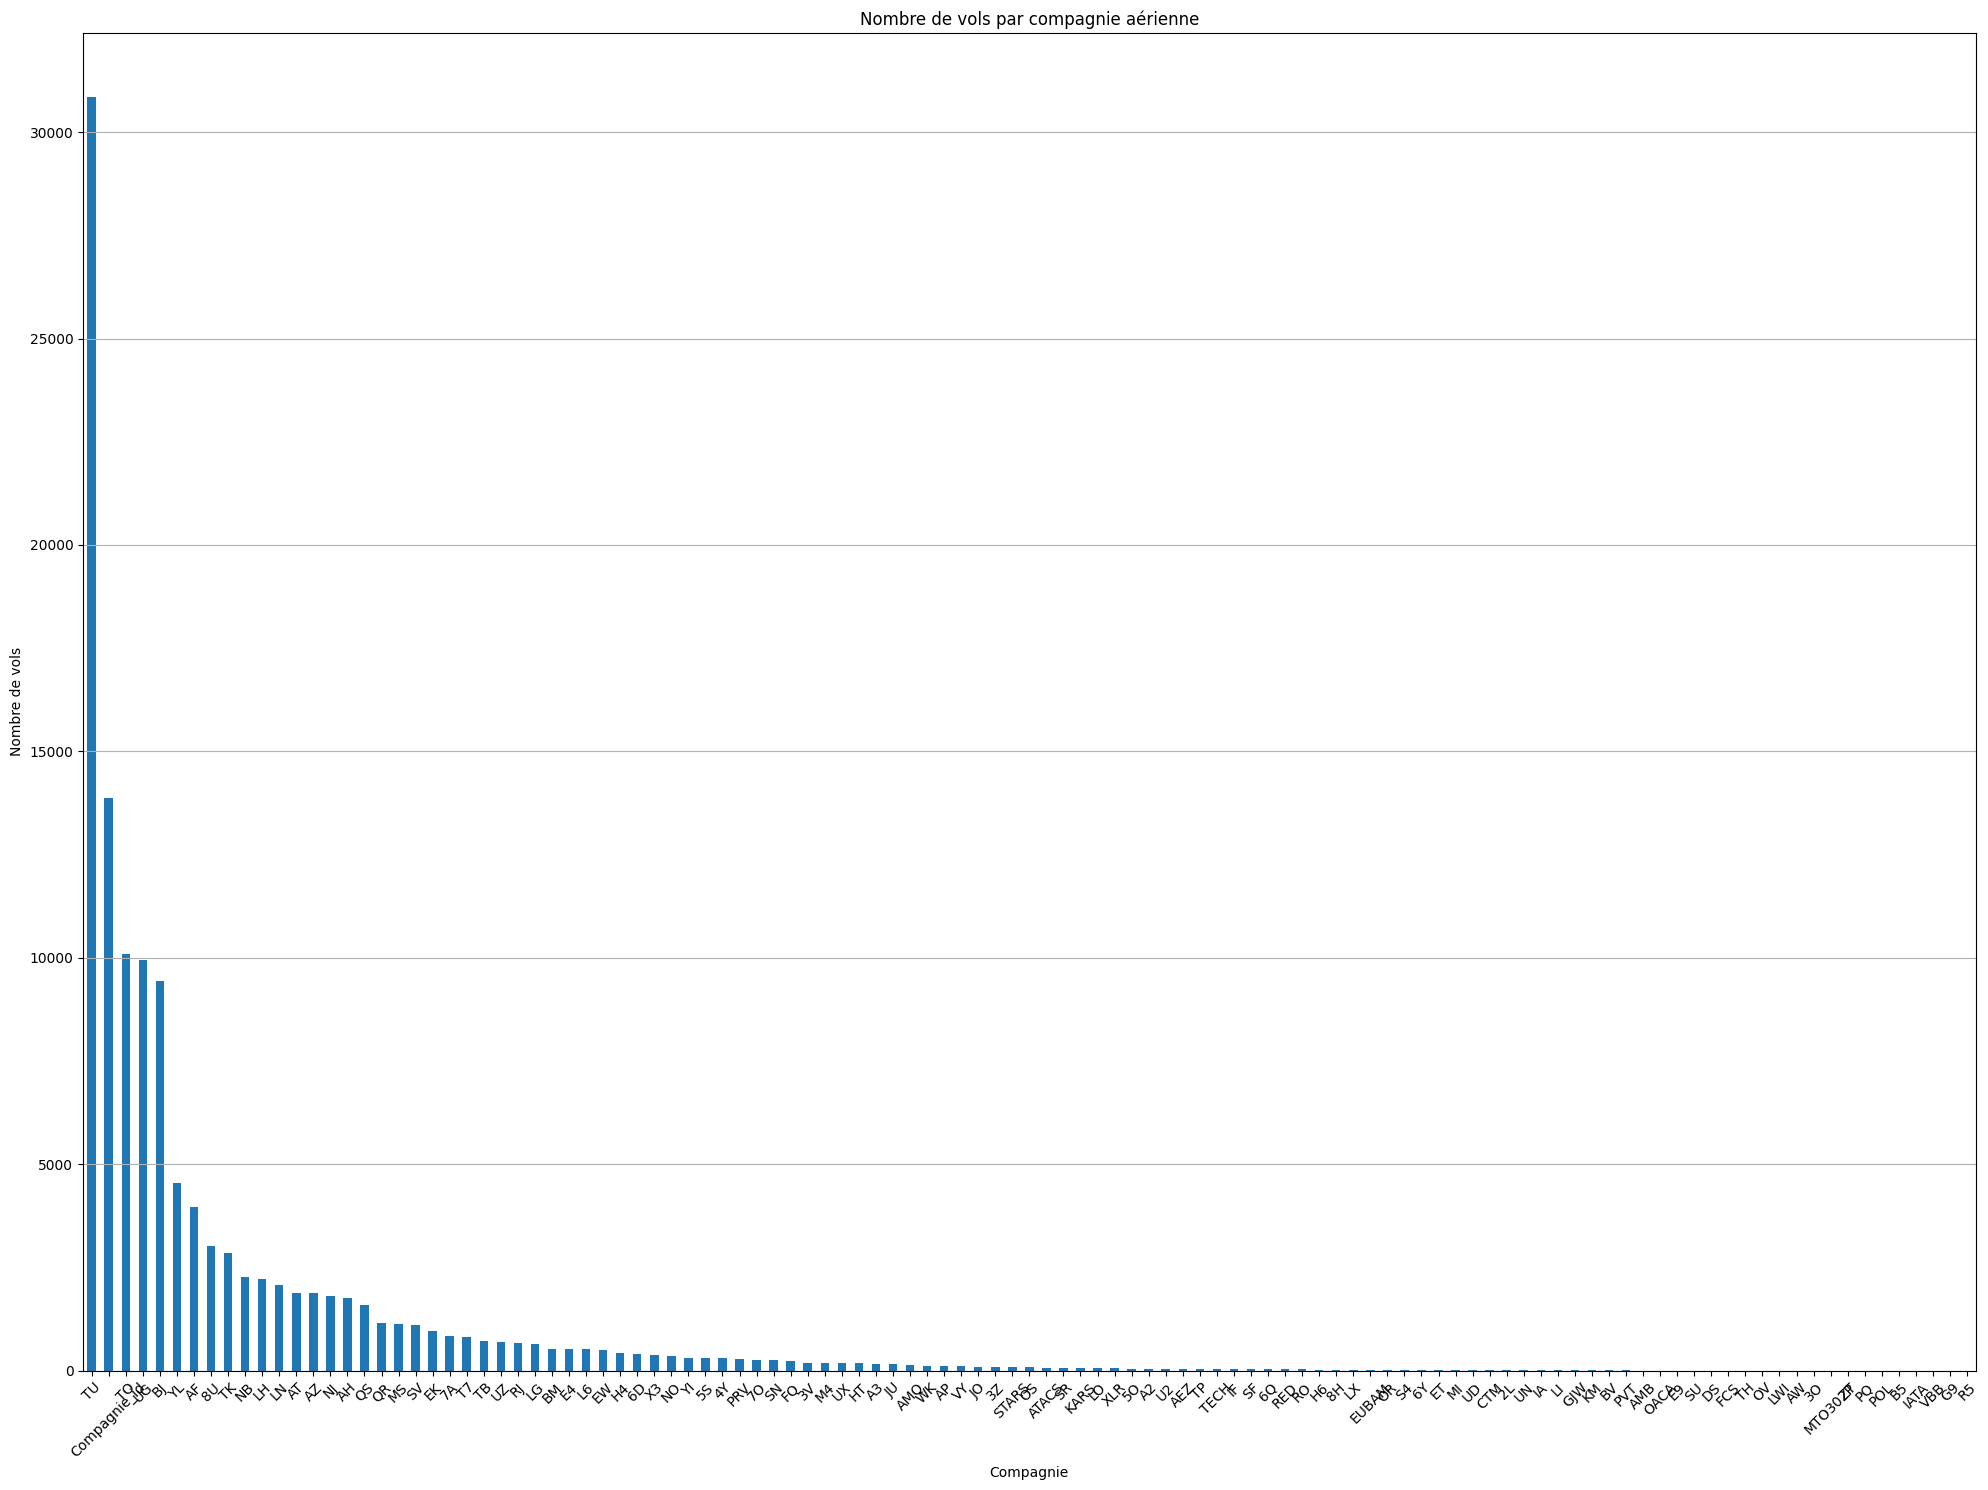

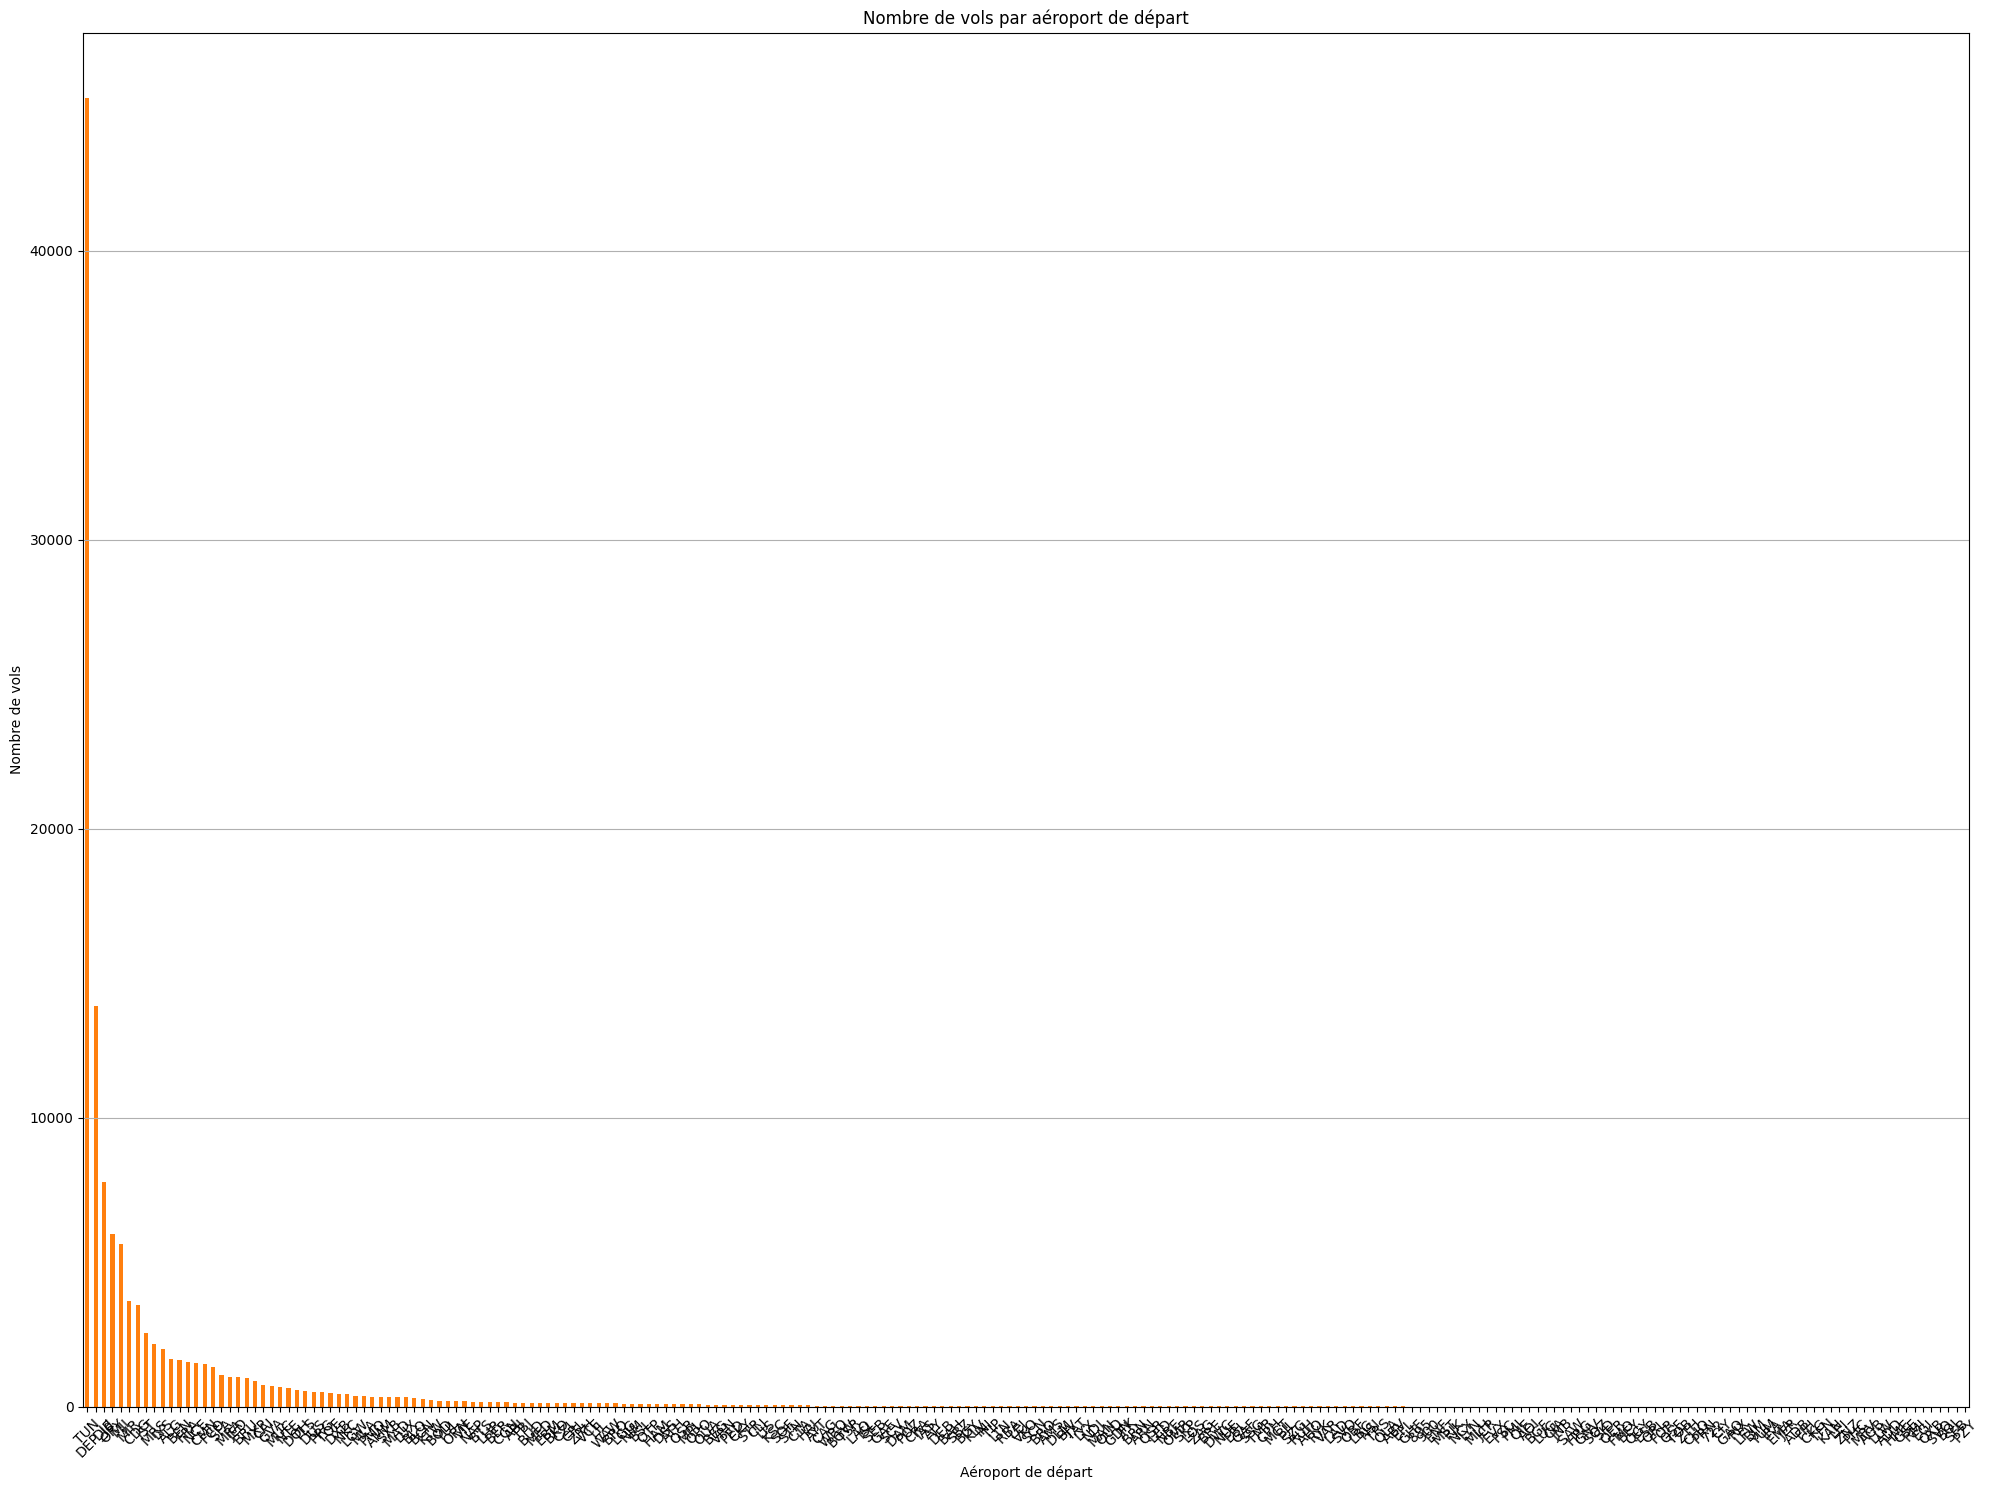

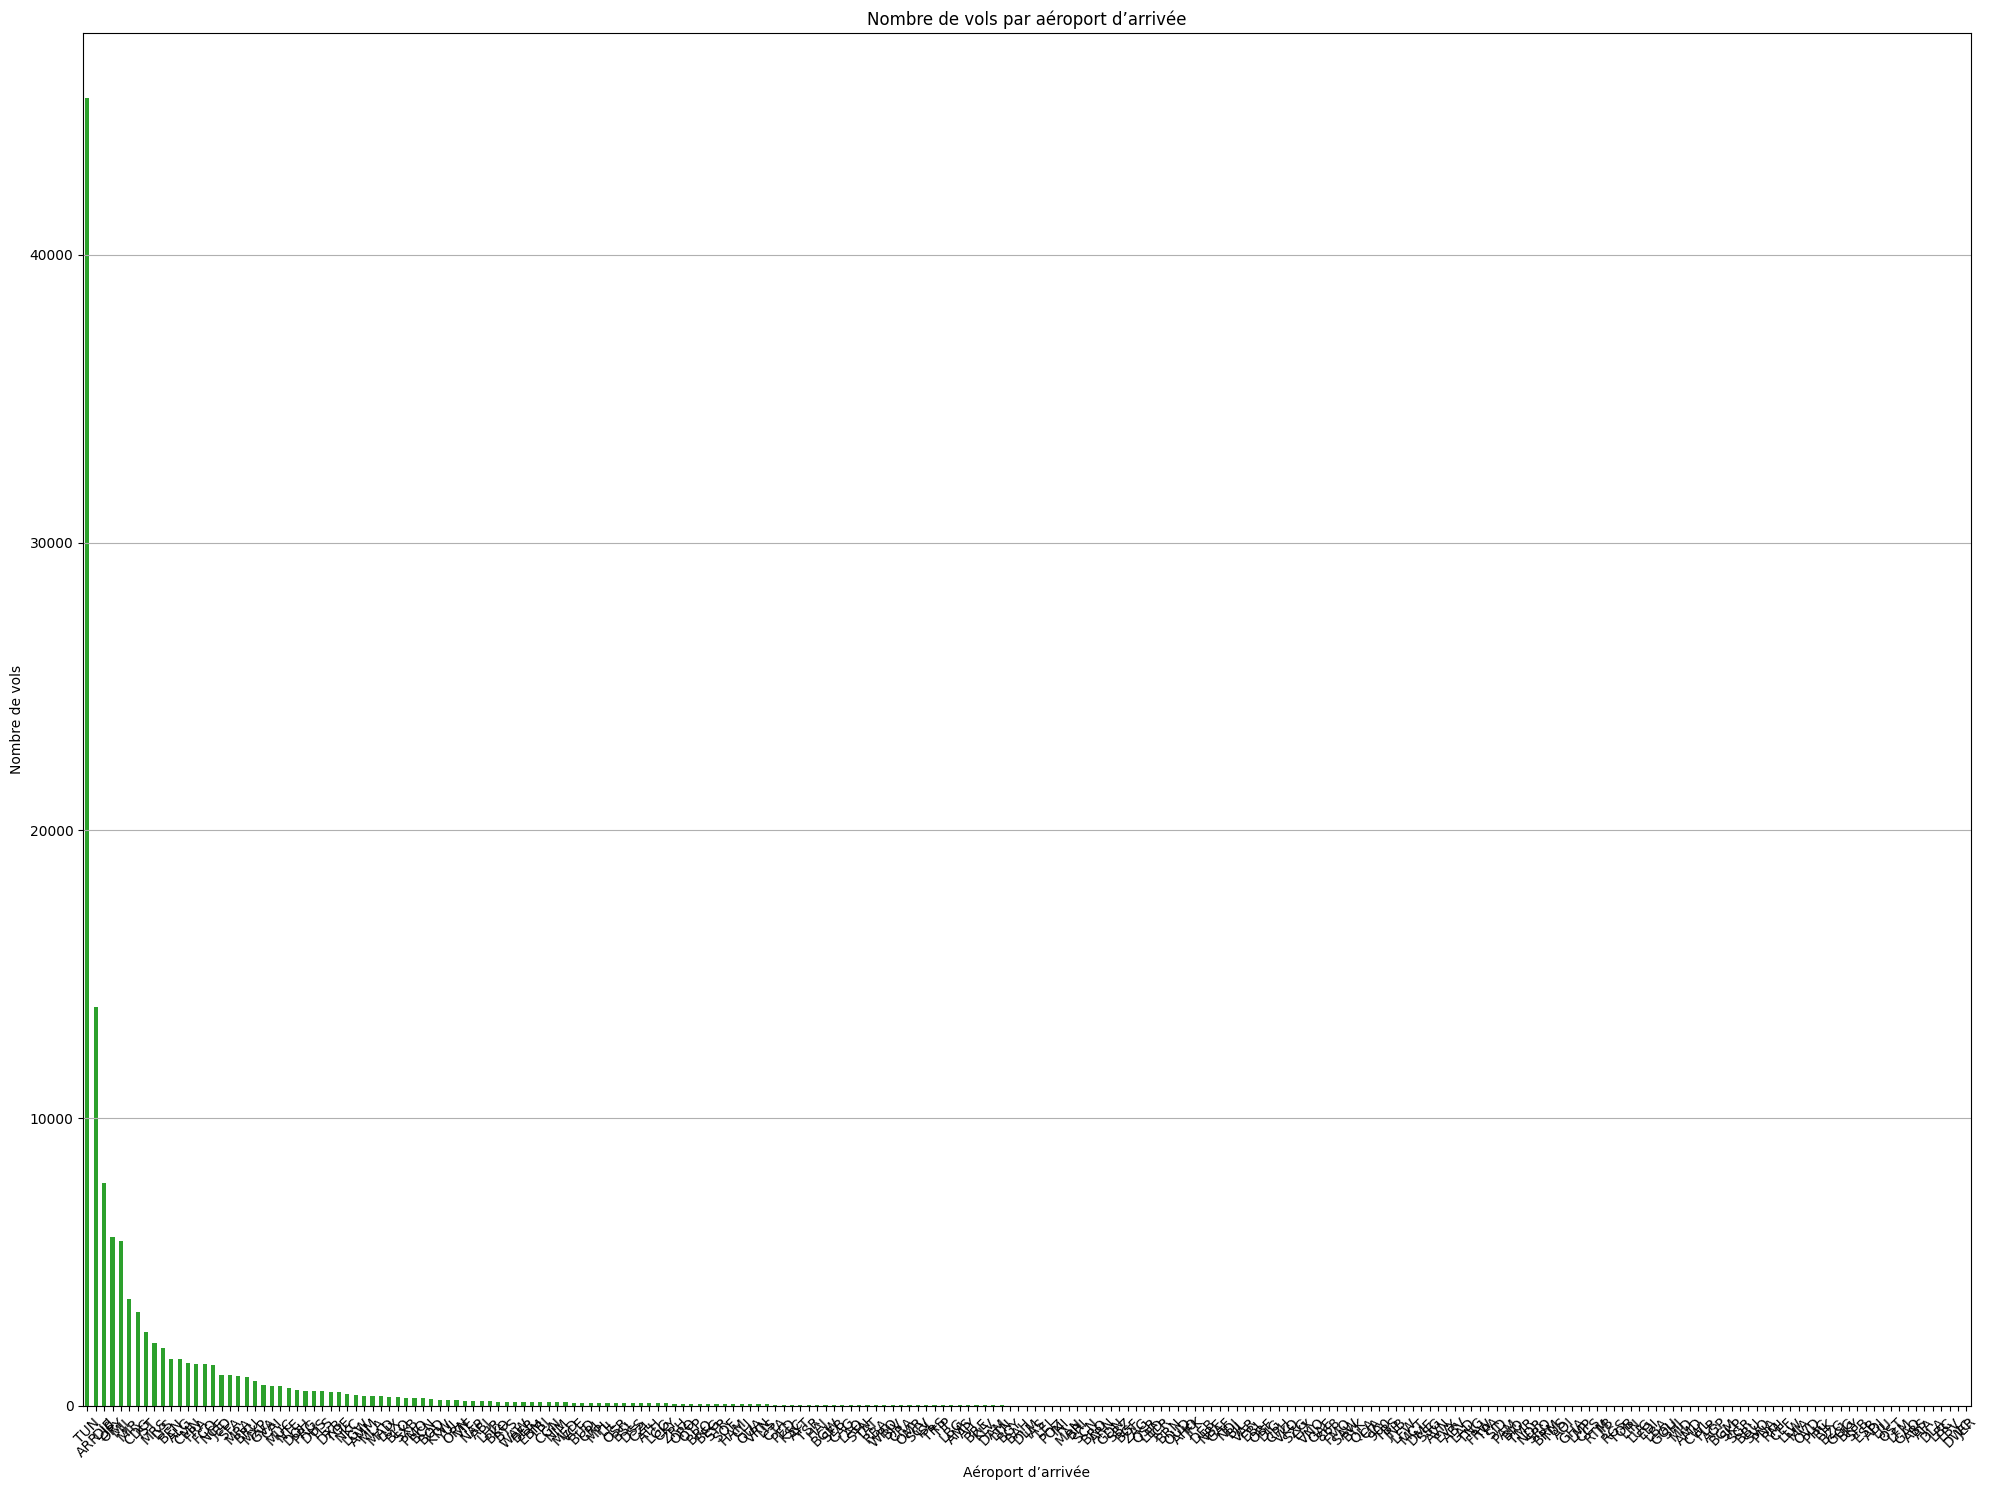

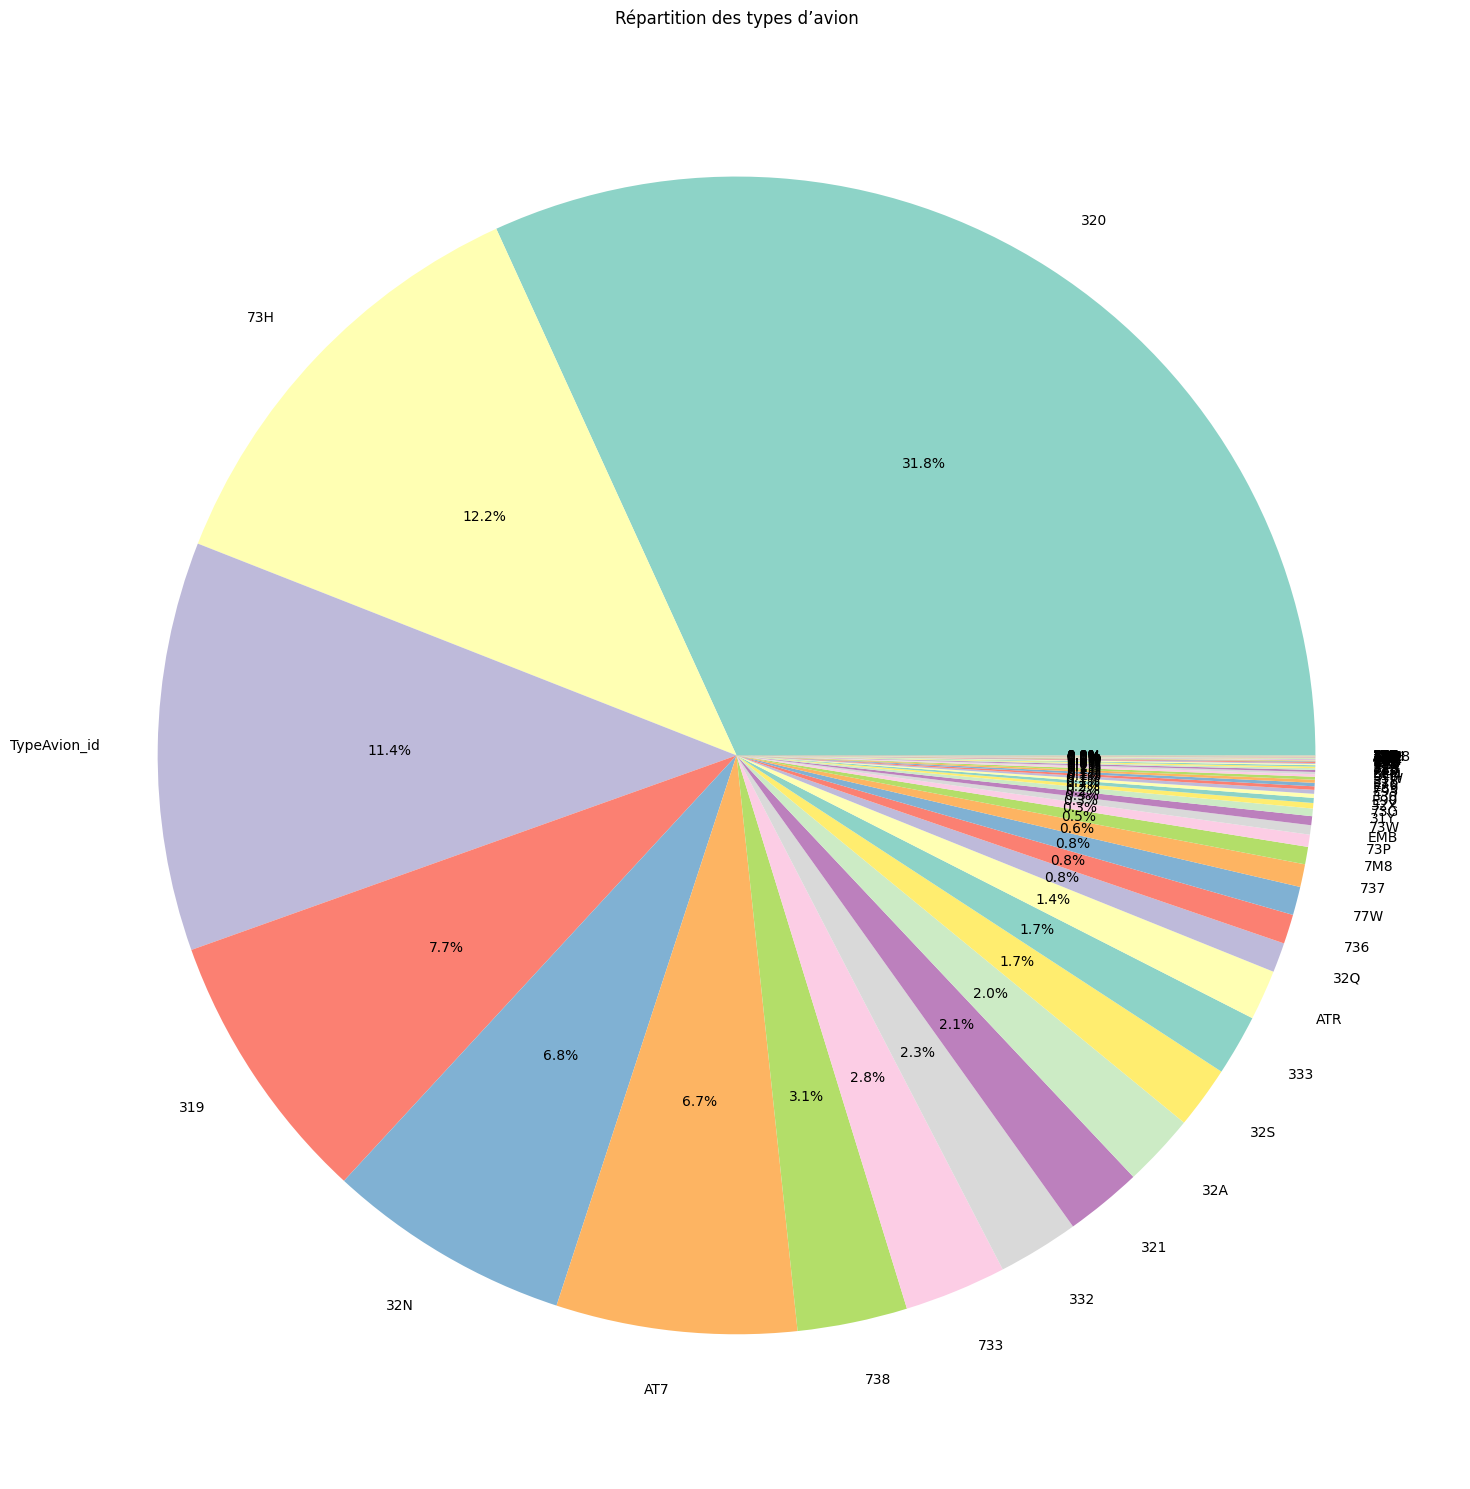

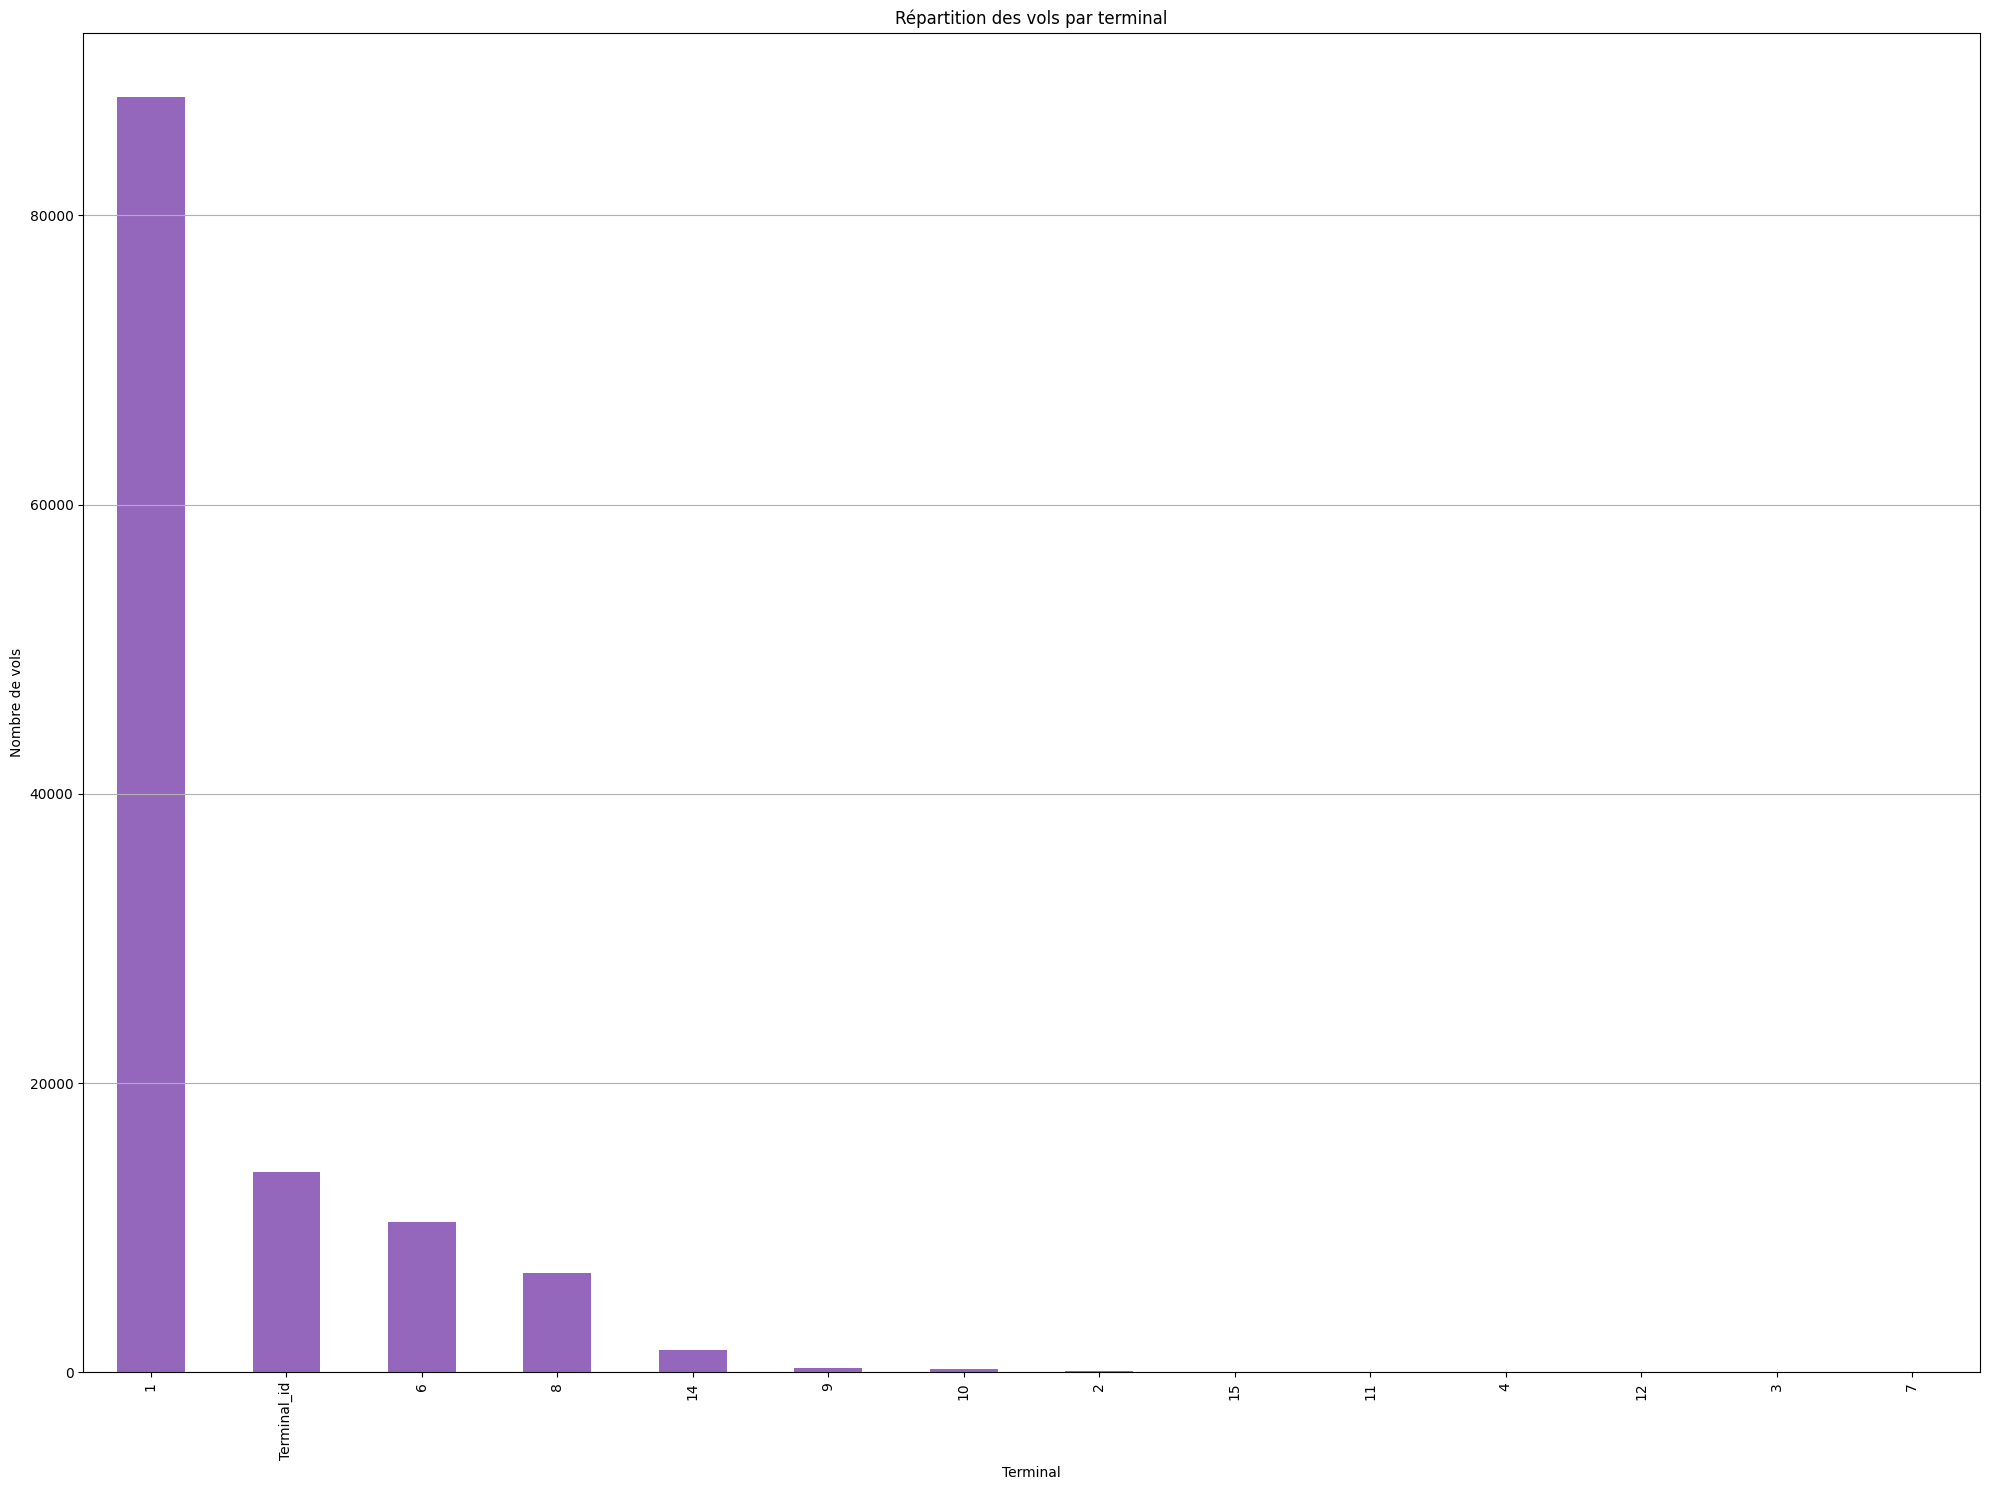

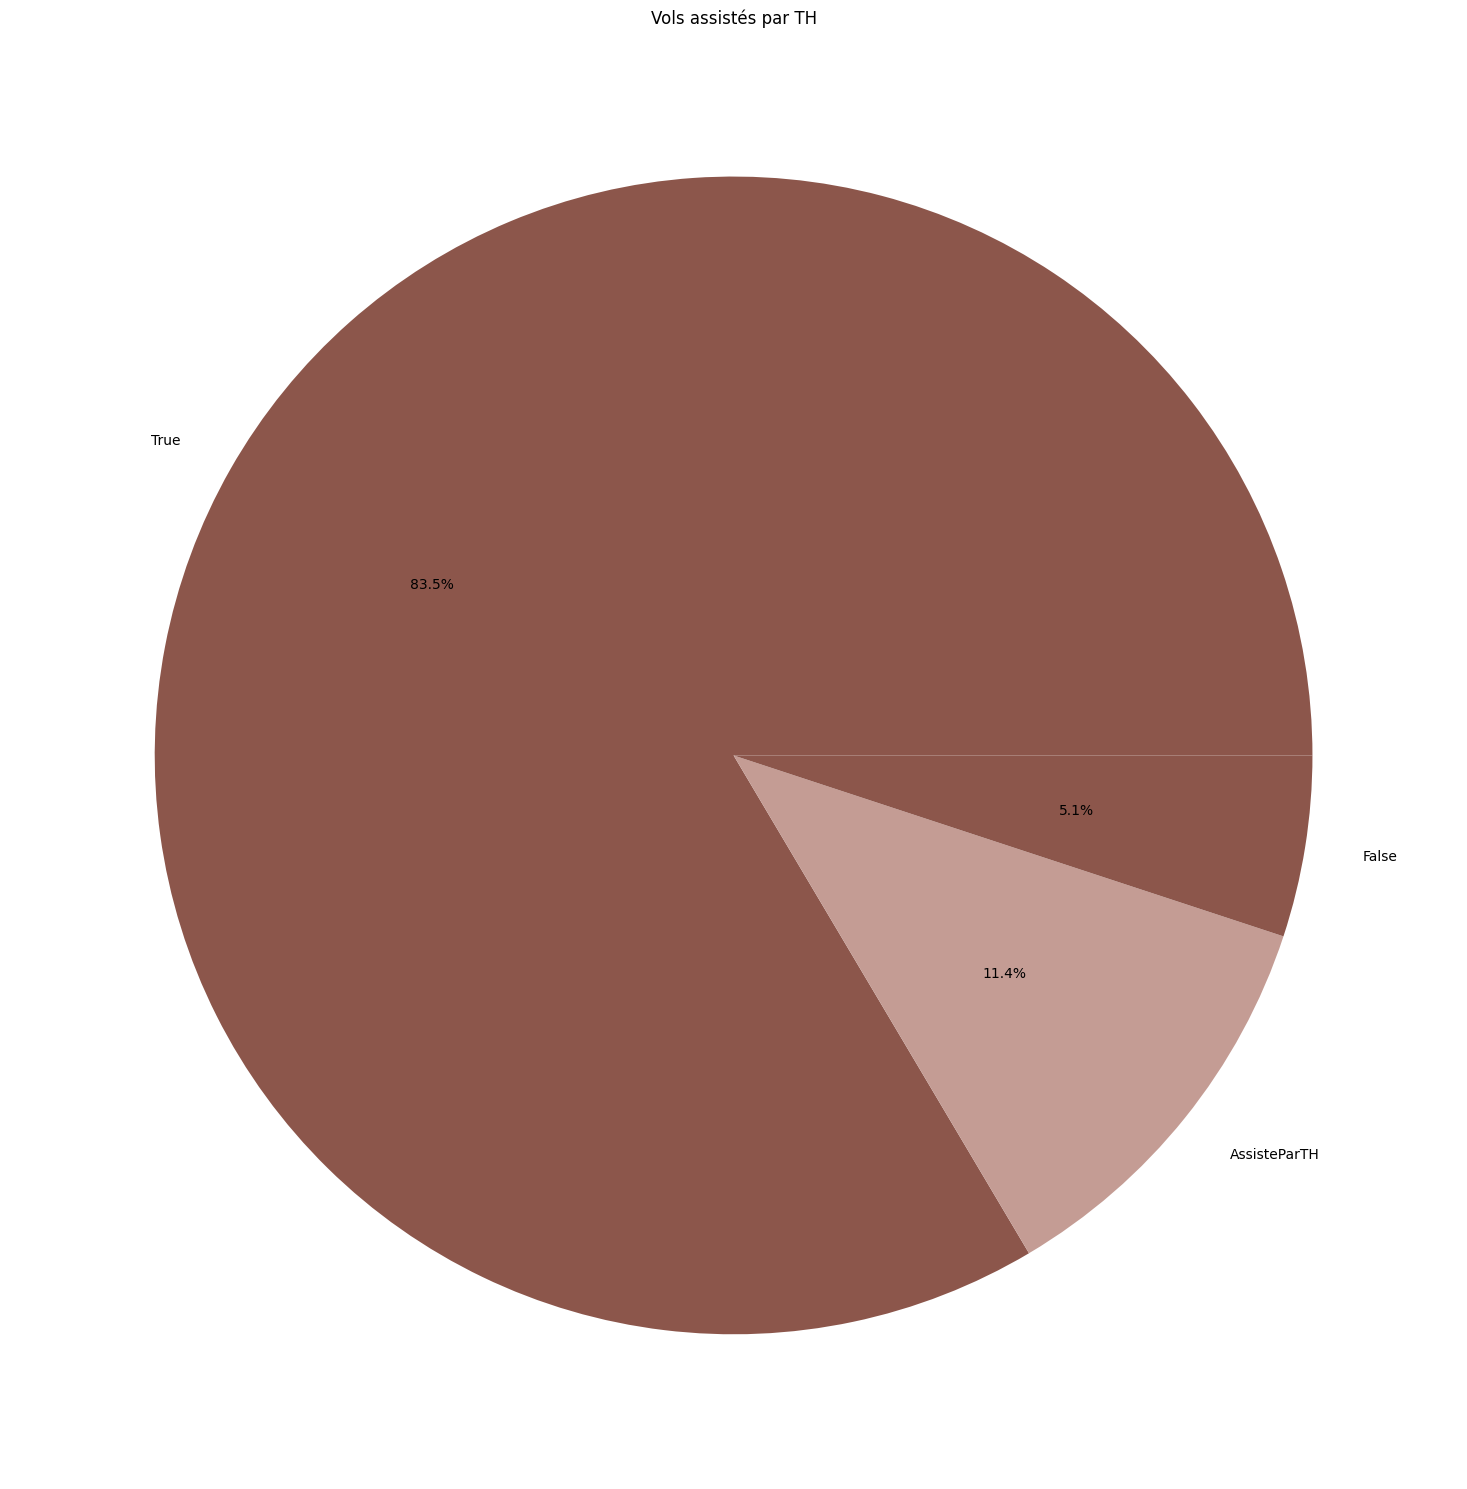

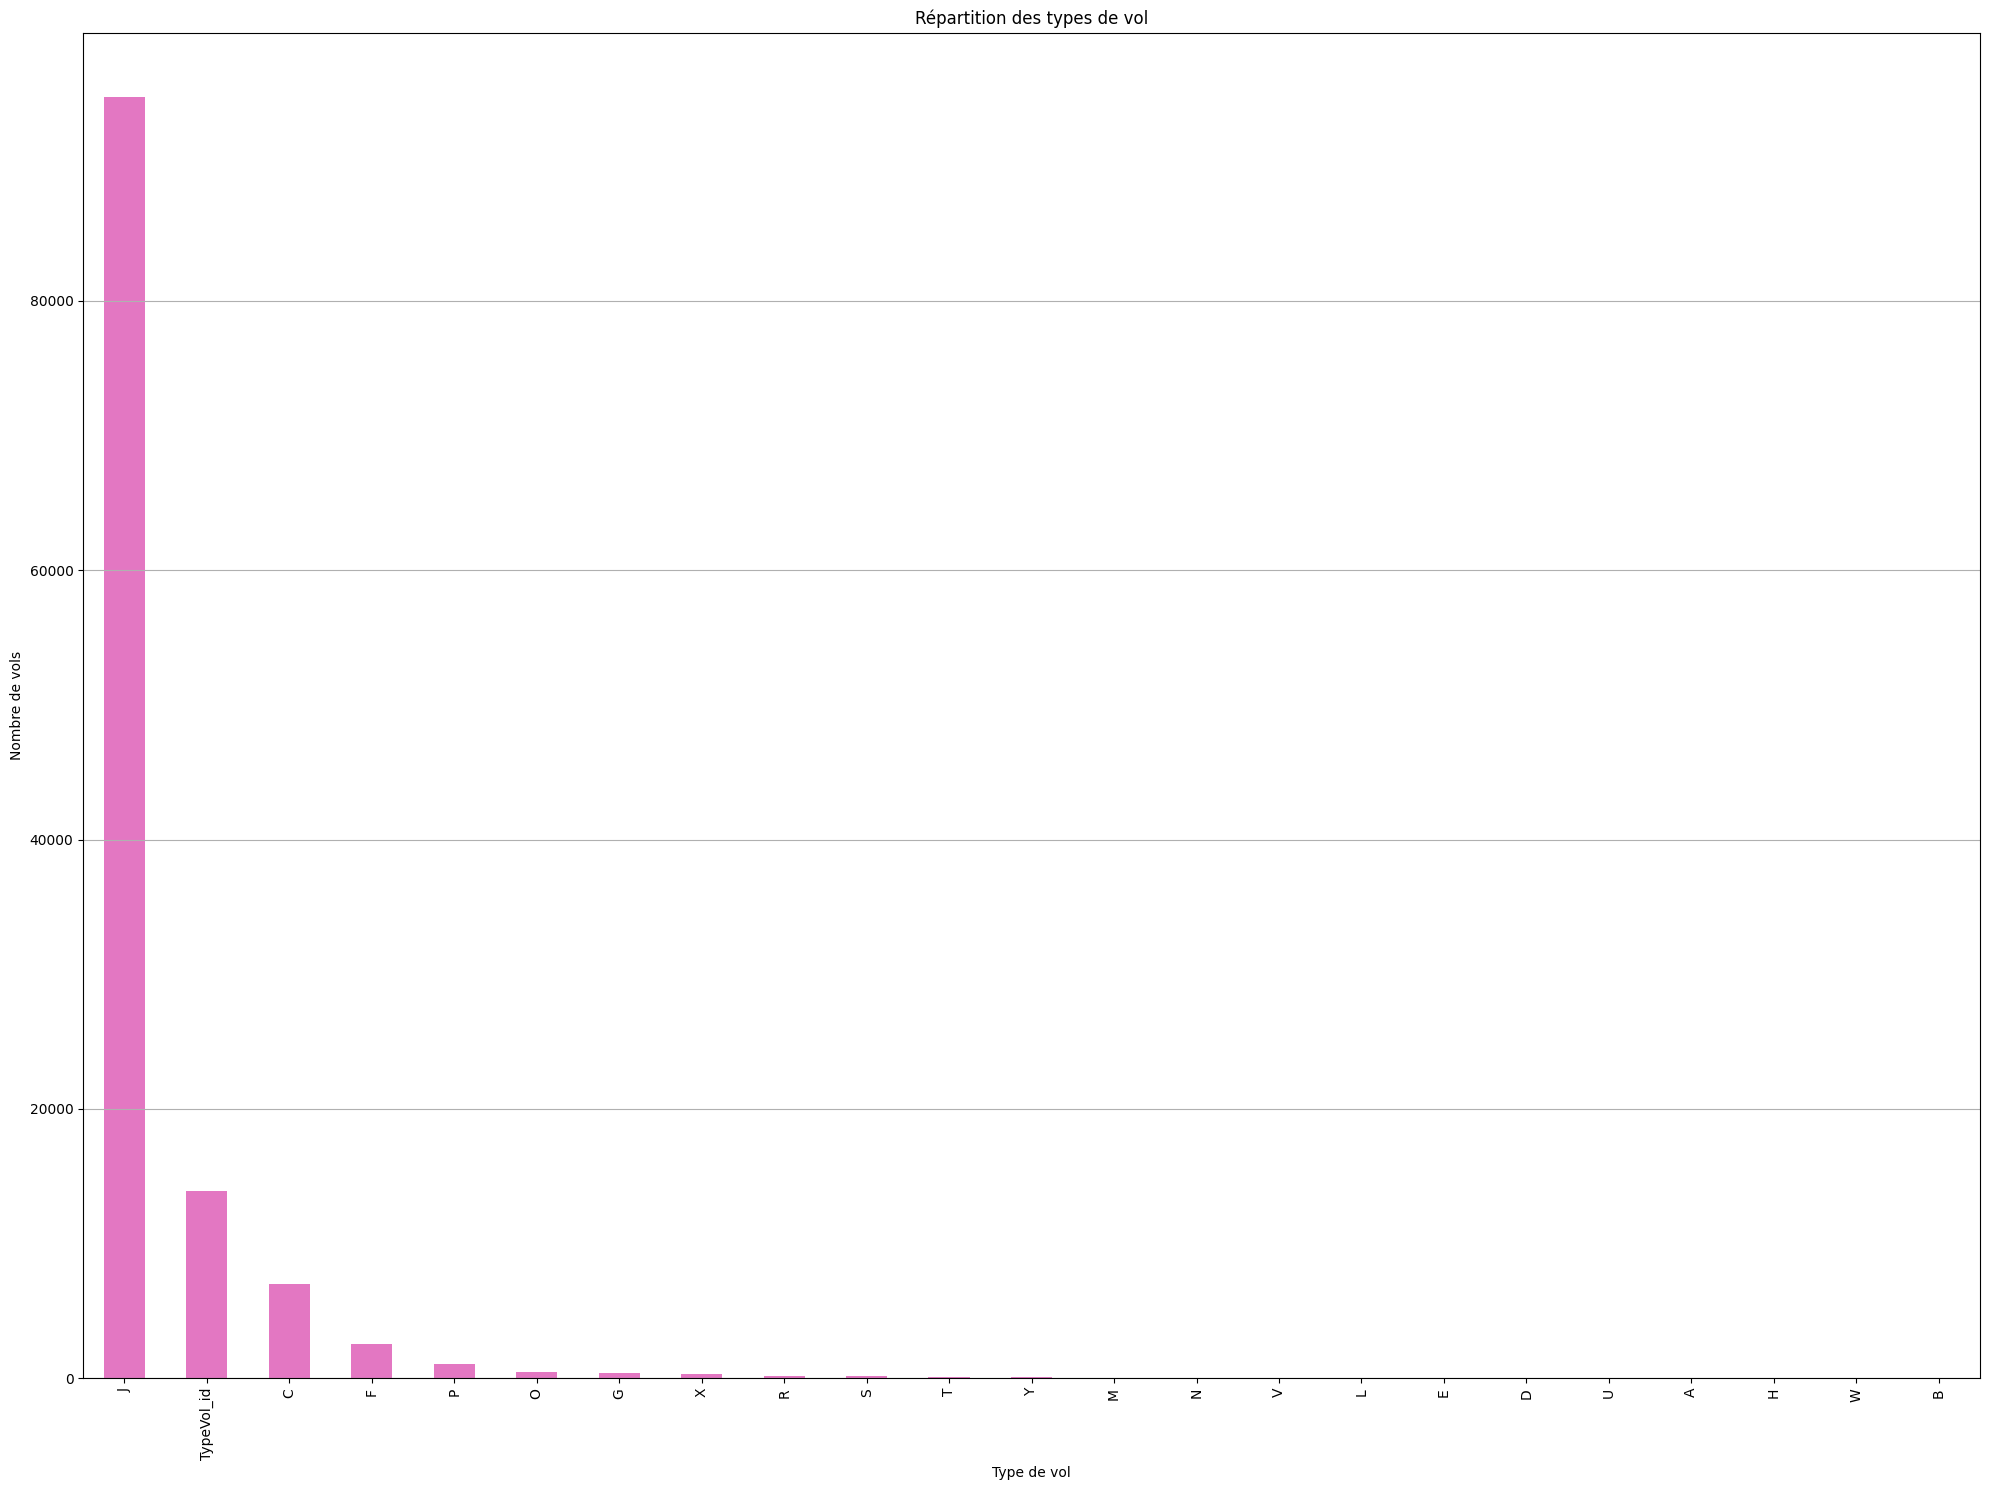

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Charger les données (remplace le chemin par le tien si nécessaire)
vol = pd.read_csv("opscontrol_vol.csv")

# Ajuster taille des graphiques
plt.rcParams["figure.figsize"] = (20, 15)

# 1. Vols par compagnie aérienne (bar chart)
vol['Compagnie_id'].value_counts().plot(kind='bar', color='#1f77b4')
plt.title("Nombre de vols par compagnie aérienne")
plt.xlabel("Compagnie")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Vols par aéroport de départ (bar chart)
vol['DEP_id'].value_counts().plot(kind='bar', color='#ff7f0e')
plt.title("Nombre de vols par aéroport de départ")
plt.xlabel("Aéroport de départ")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Vols par aéroport d’arrivée (bar chart)
vol['ARR_id'].value_counts().plot(kind='bar', color='#2ca02c')
plt.title("Nombre de vols par aéroport d’arrivée")
plt.xlabel("Aéroport d’arrivée")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Vols par type d’avion (pie chart)
vol['TypeAvion_id'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title("Répartition des types d’avion")
plt.ylabel("")  # Pour enlever la mention de l’axe y
plt.tight_layout()
plt.show()

# 5. Répartition par terminal (bar chart)
vol['Terminal_id'].value_counts().plot(kind='bar', color='#9467bd')
plt.title("Répartition des vols par terminal")
plt.xlabel("Terminal")
plt.ylabel("Nombre de vols")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 6. Vols assistés ou non par TH (pie chart)
vol['AssisteParTH'].value_counts().rename({True: 'Assisté', False: 'Non assisté'}).plot(
    kind='pie', autopct='%1.1f%%', colors=['#8c564b', '#c49c94'])
plt.title("Vols assistés par TH")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 7. Répartition des types de vol (bar chart)
vol['TypeVol_id'].value_counts().plot(kind='bar', color='#e377c2')
plt.title("Répartition des types de vol")
plt.xlabel("Type de vol")
plt.ylabel("Nombre de vols")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


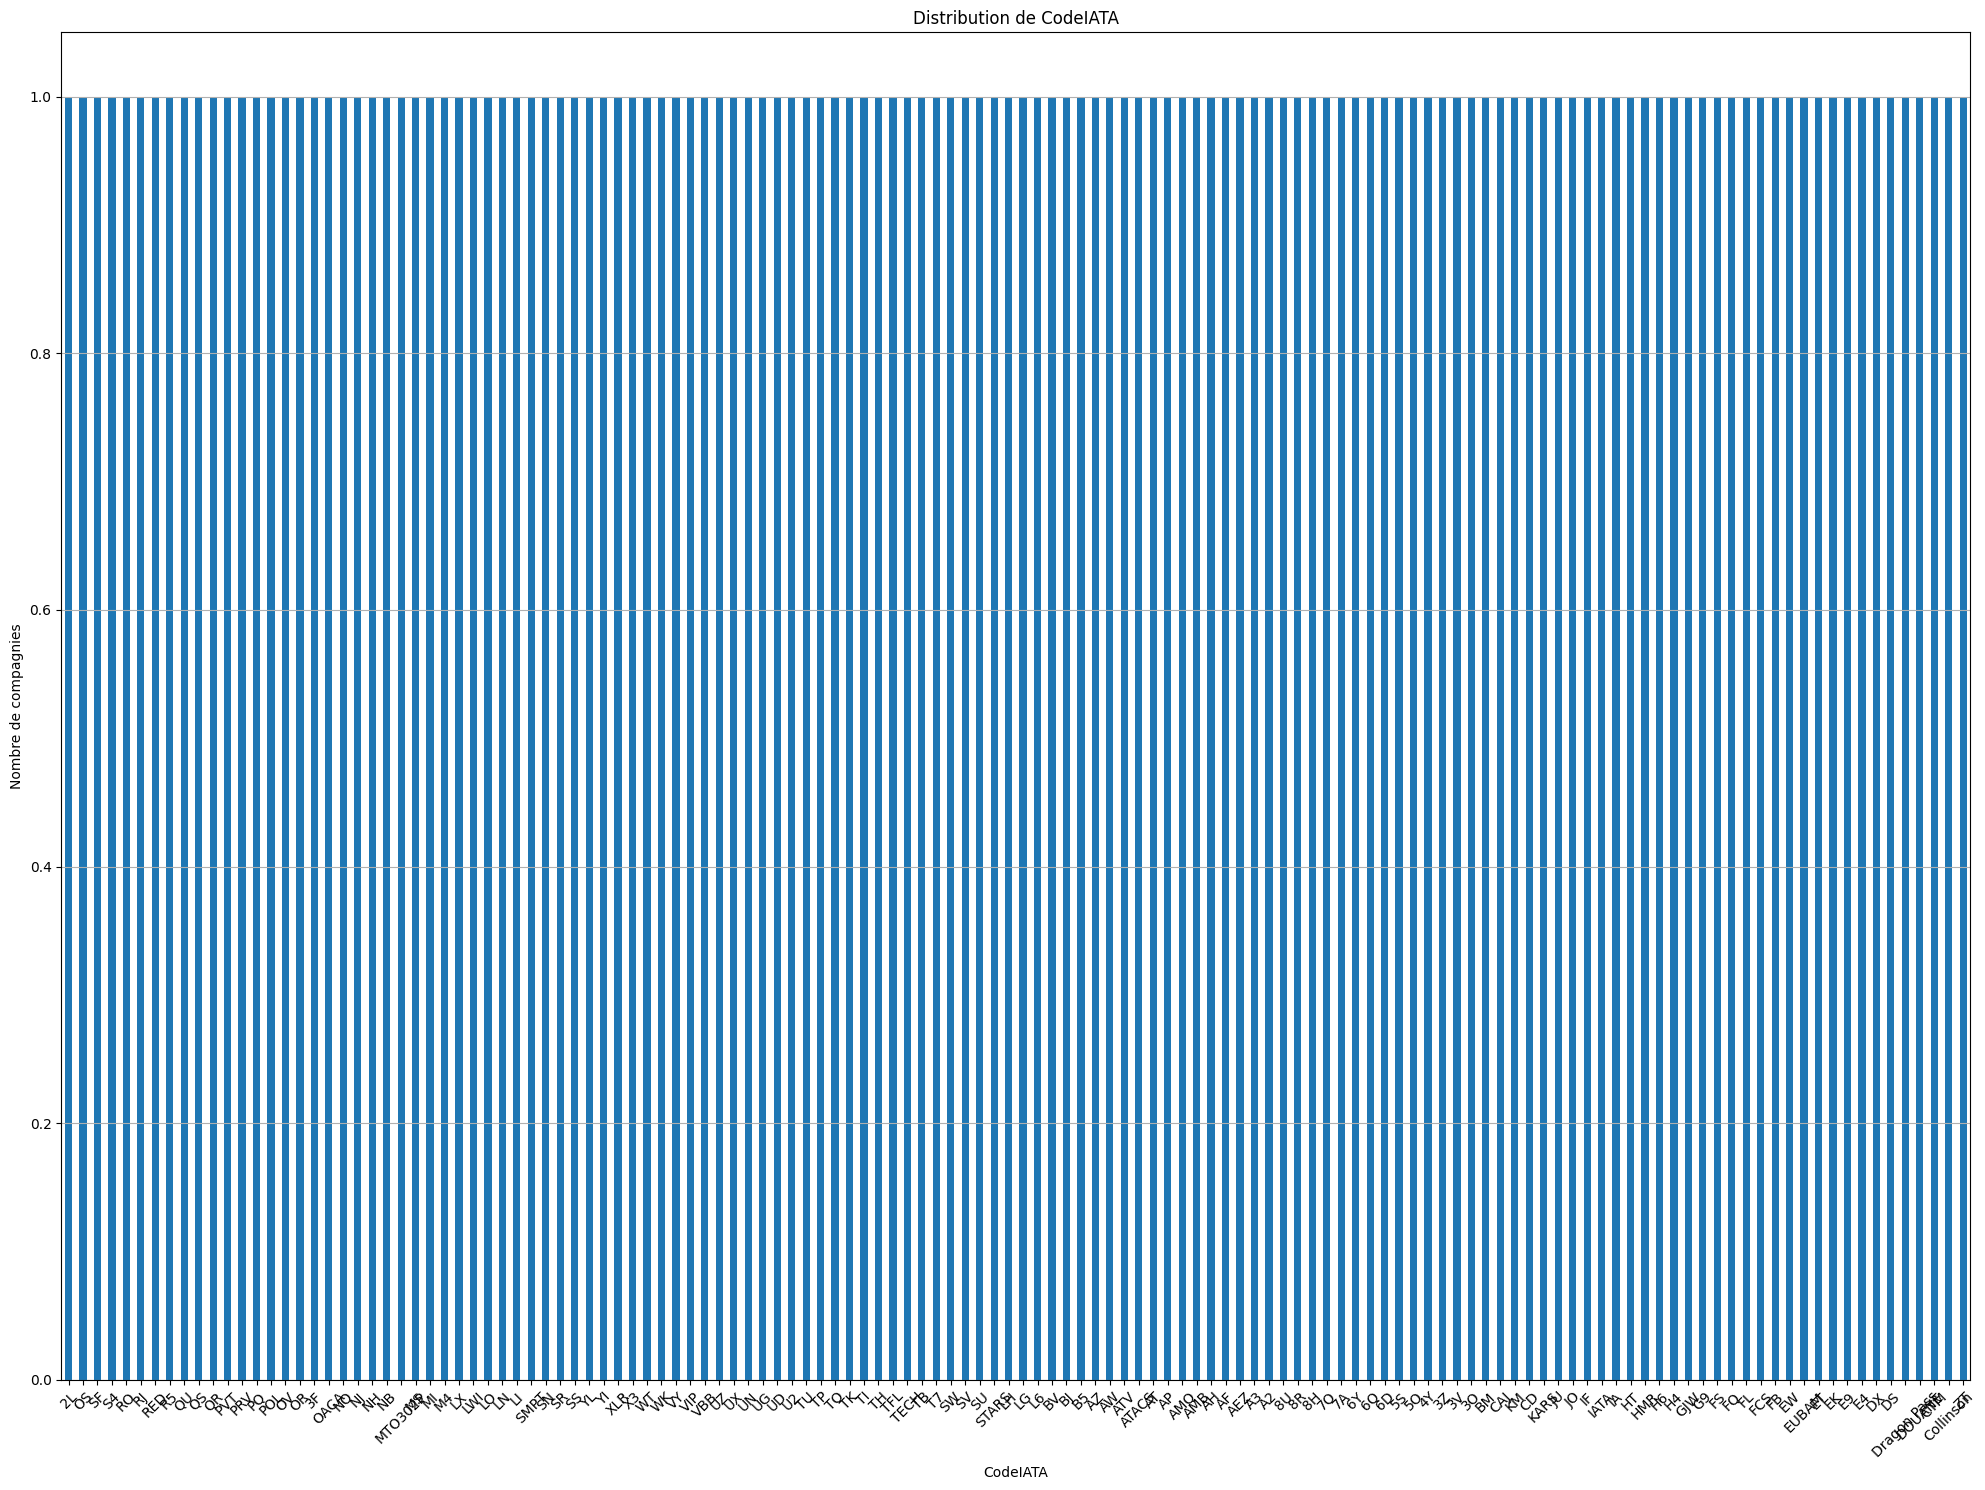

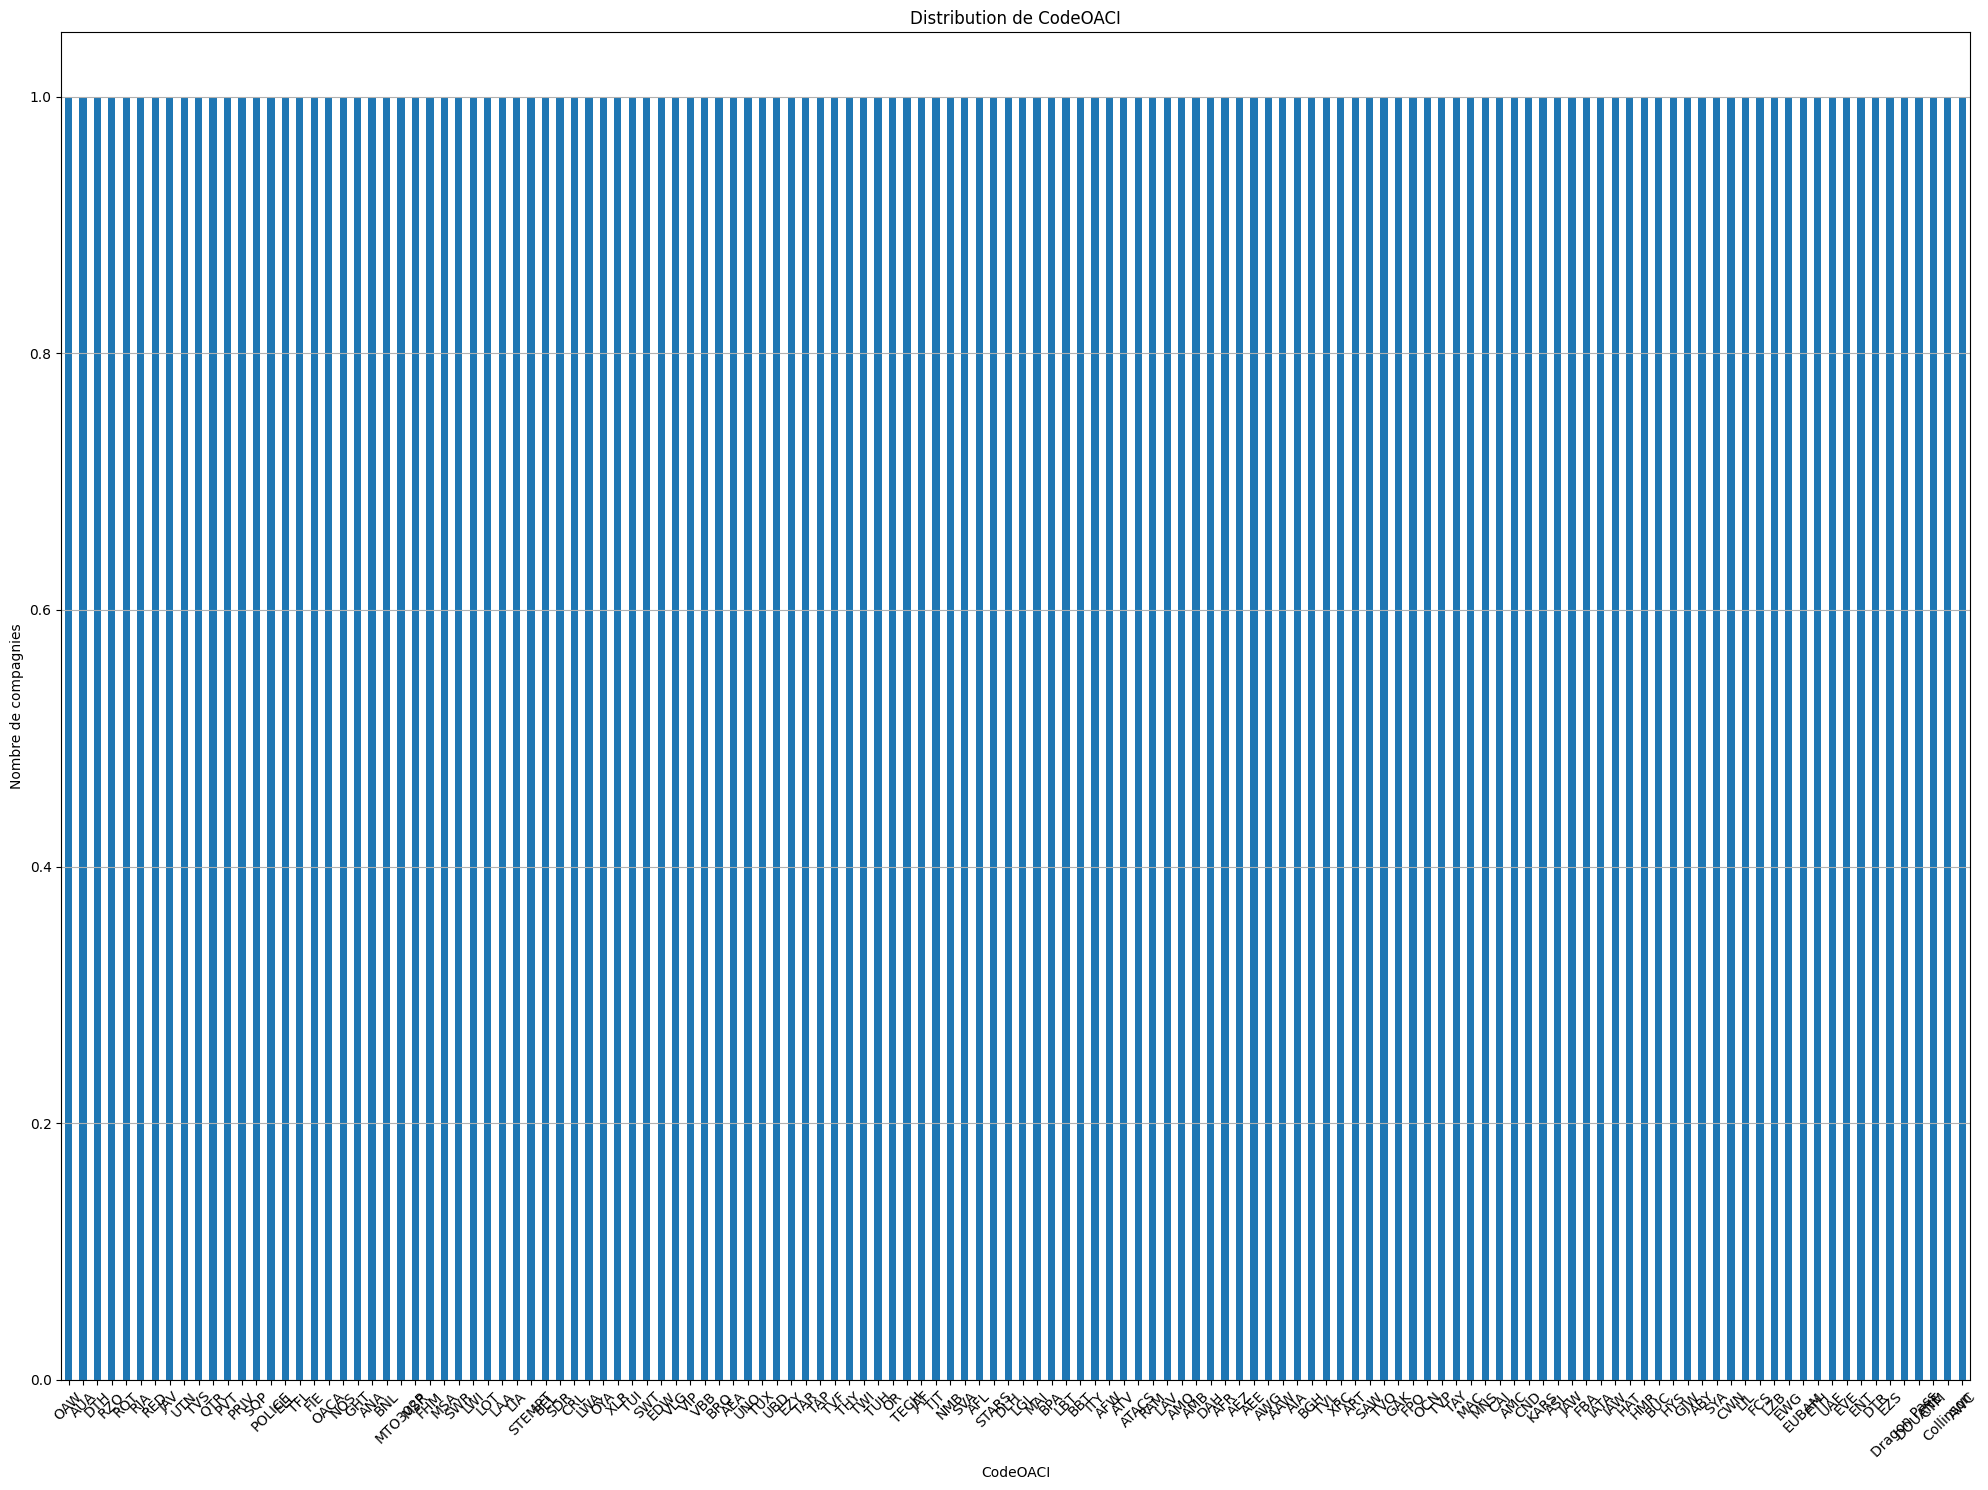

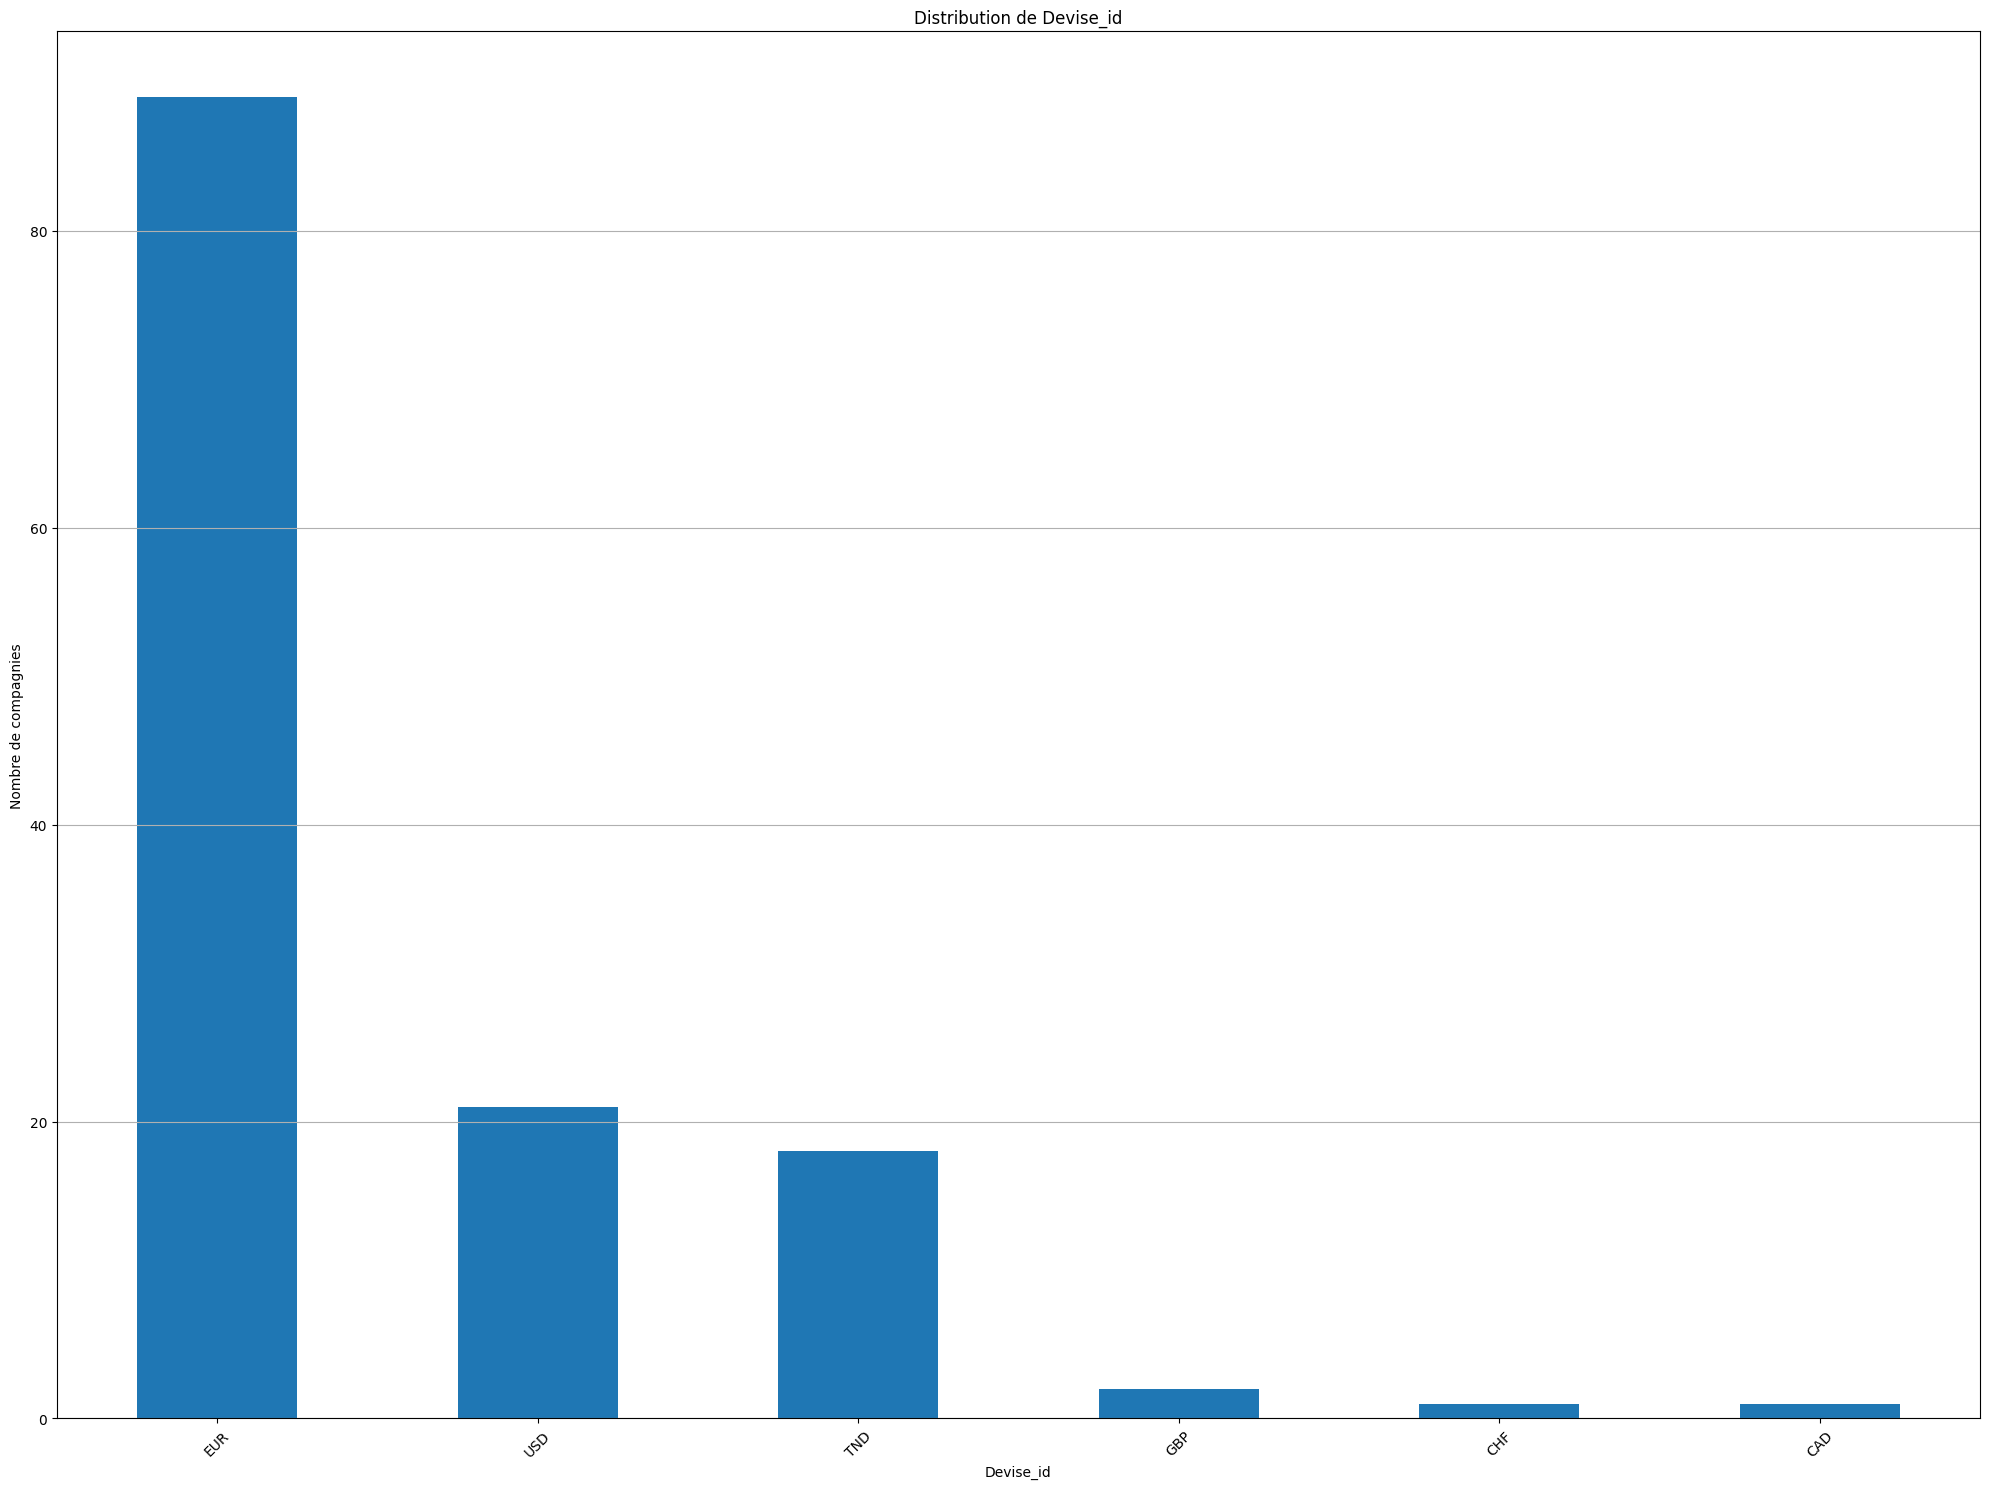

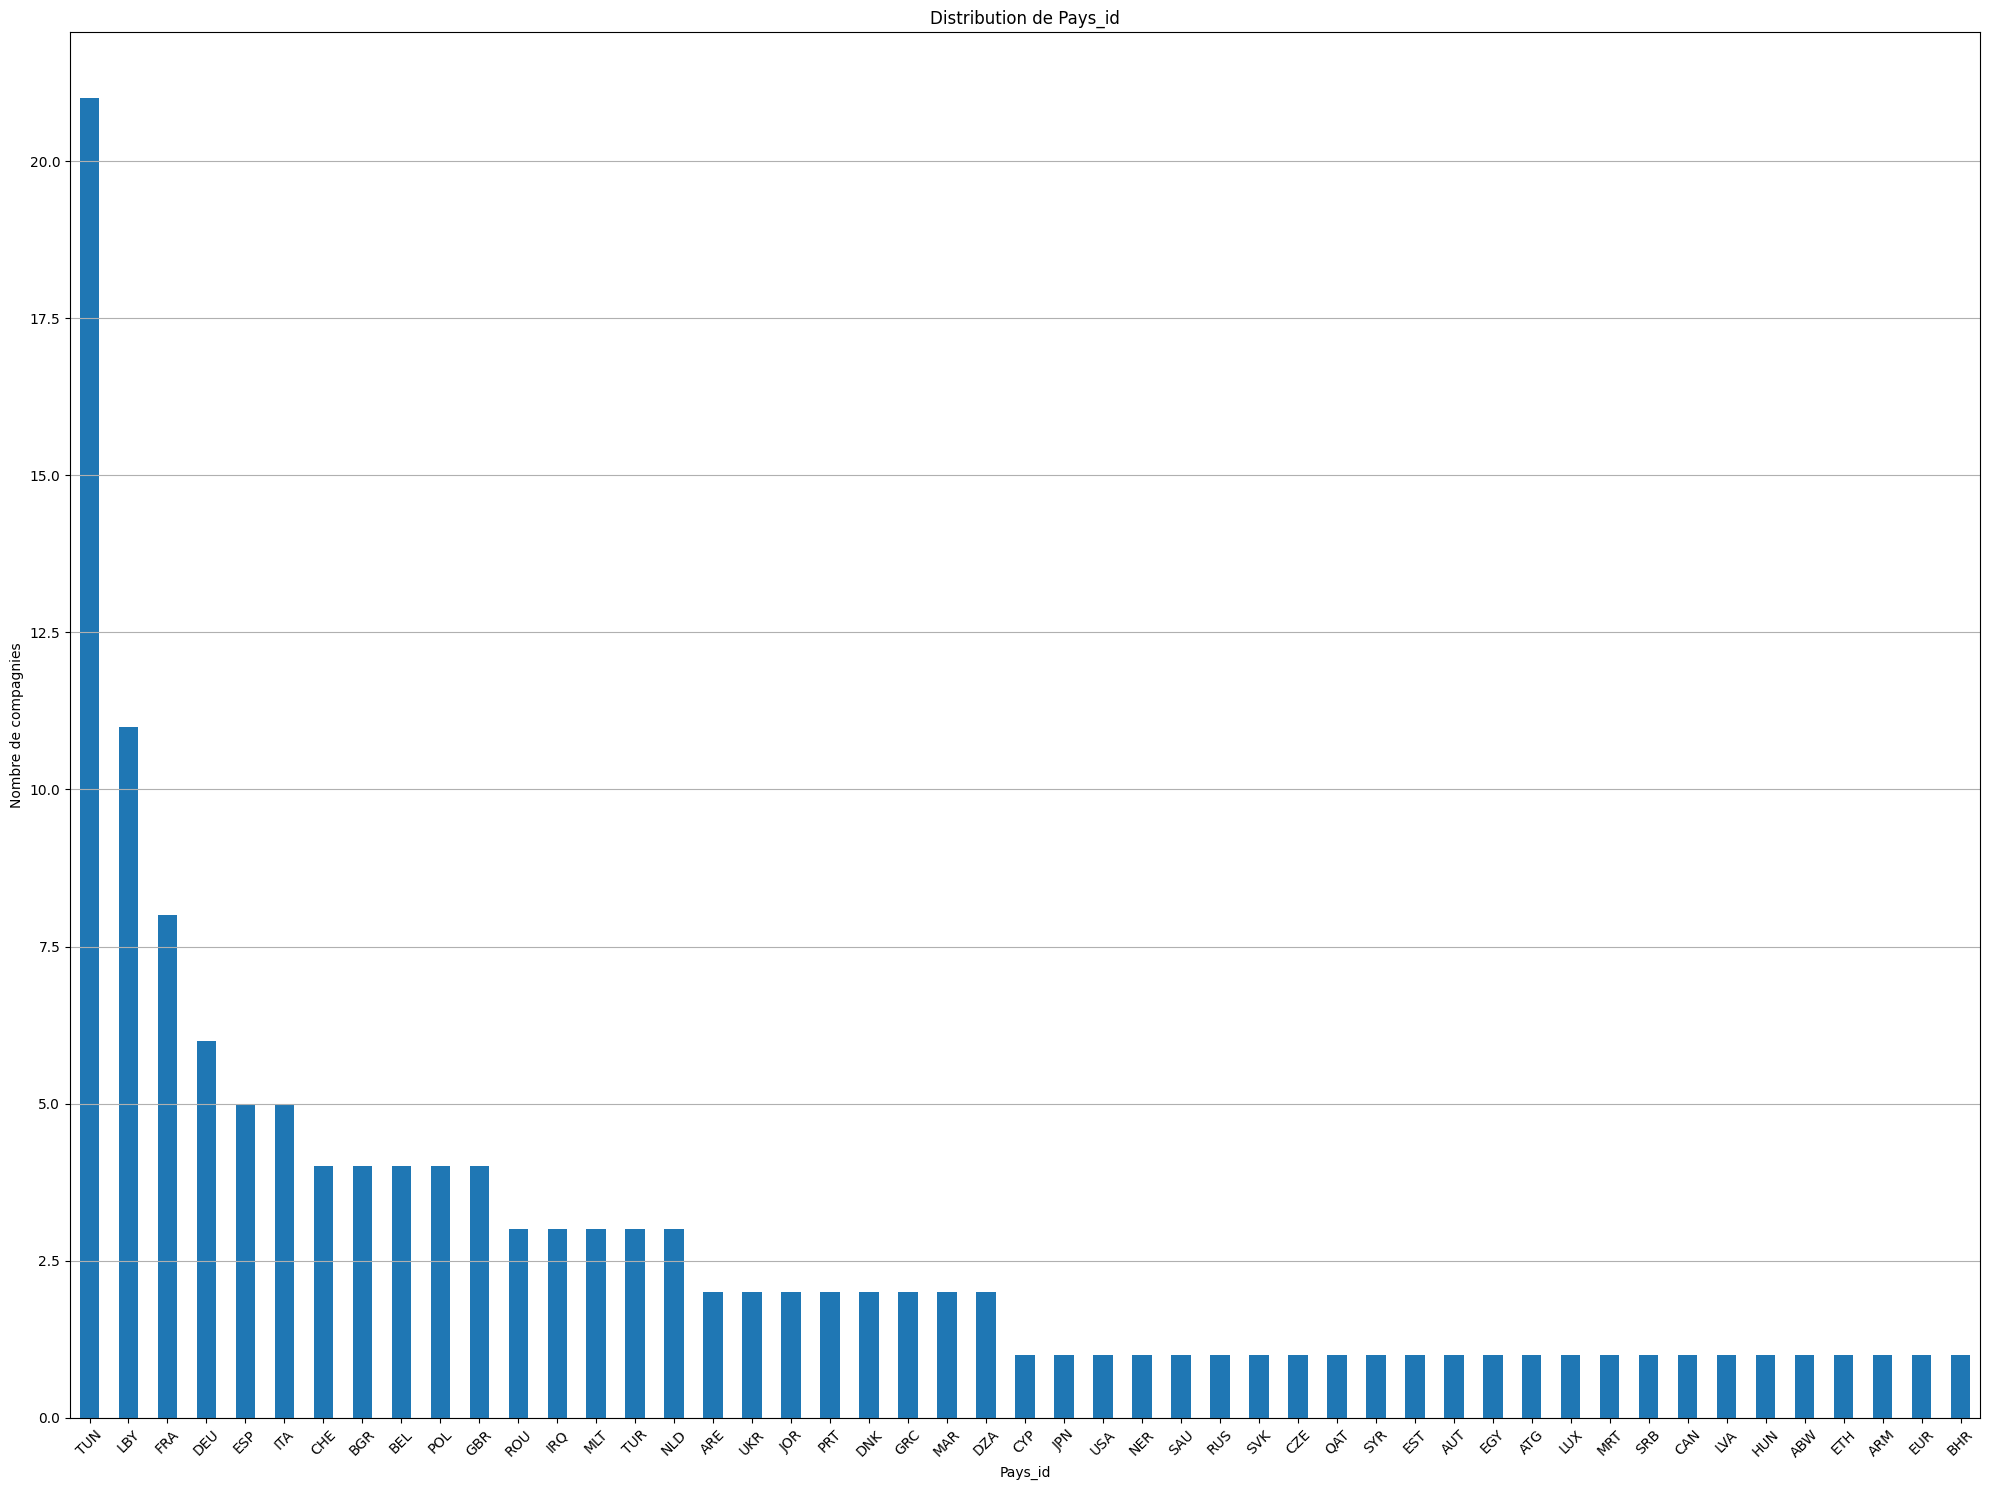

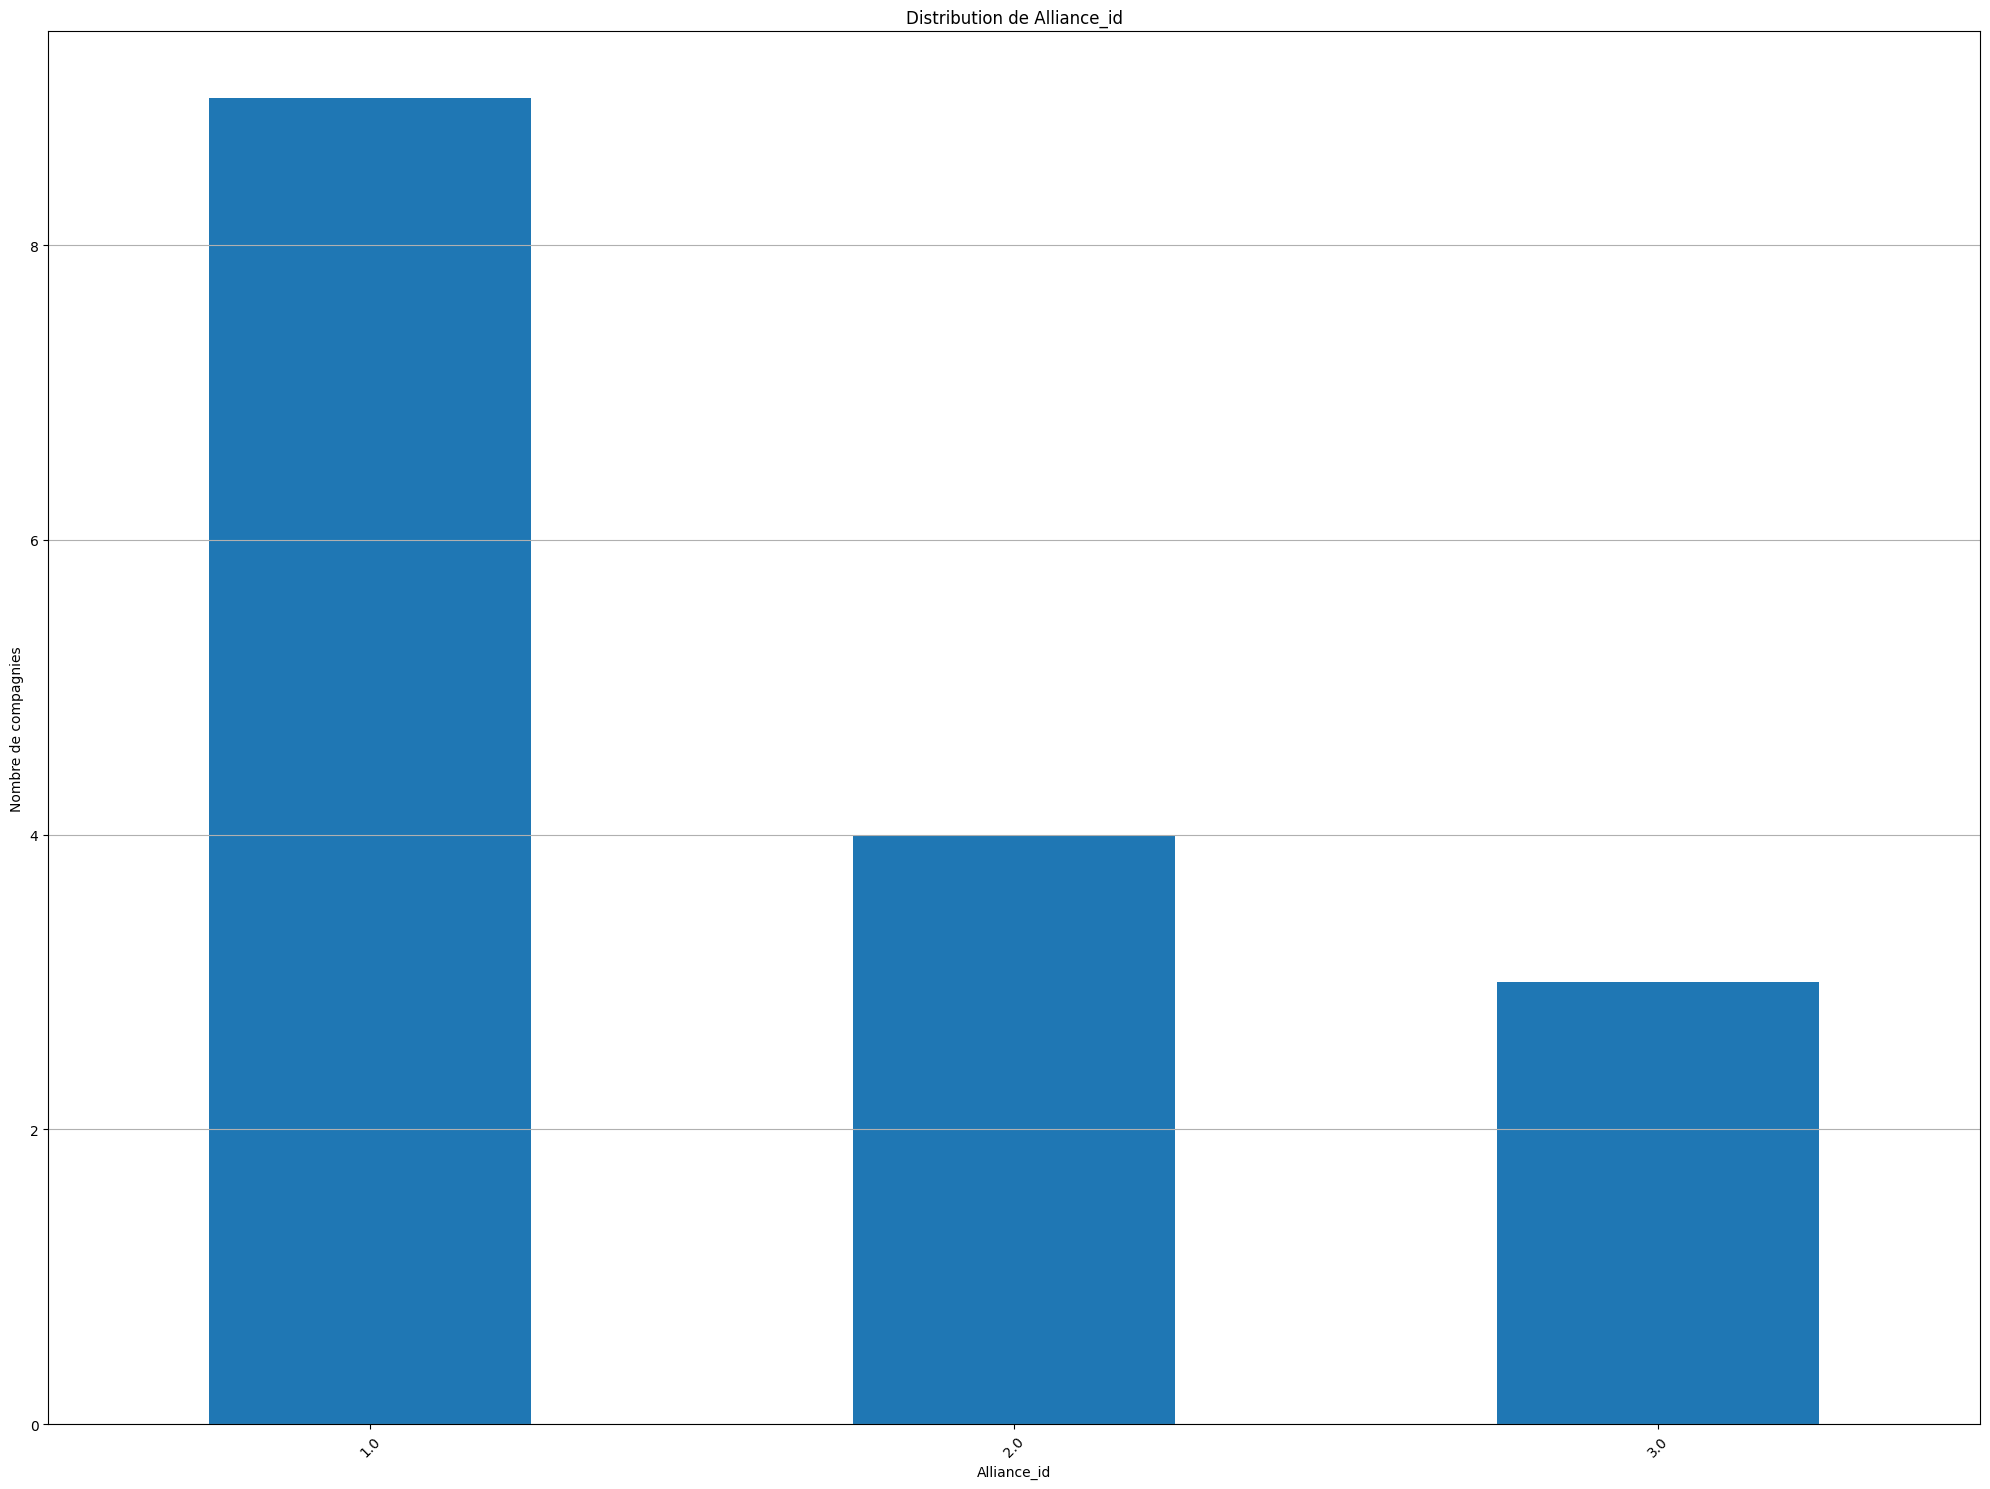

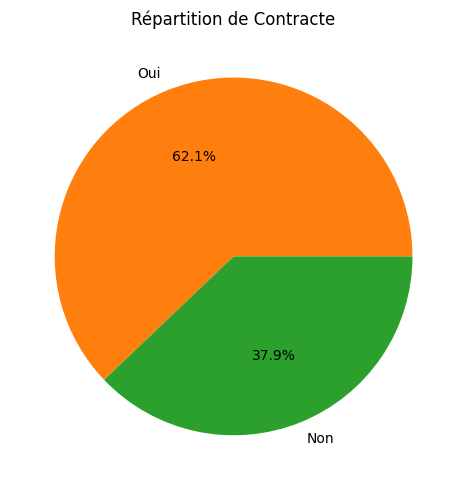

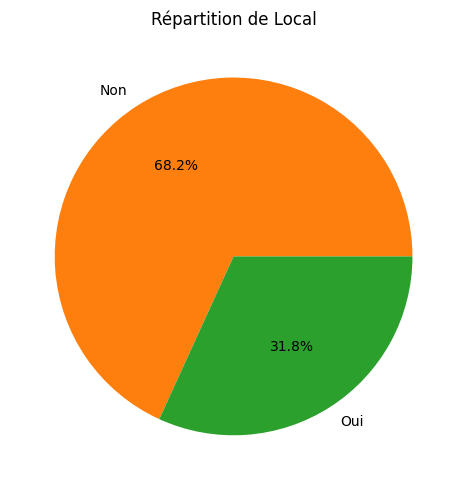

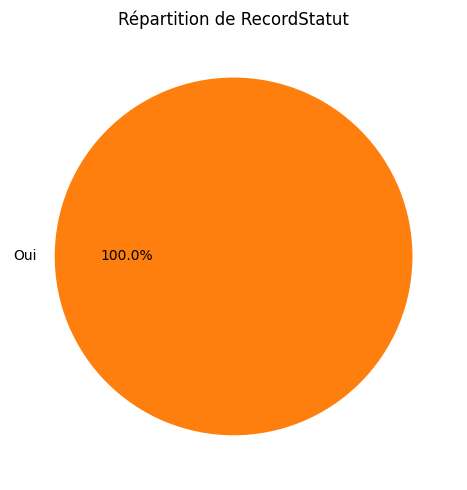

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
compagnie = pd.read_csv("opscontrol_compagnie.csv")

# Définir les couleurs
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Bar chart pour les colonnes catégorielles utiles
for col in ['CodeIATA', 'CodeOACI', 'Devise_id', 'Pays_id', 'Alliance_id']:
    if compagnie[col].notna().sum() > 0:
        plt.figure(figsize=(20, 15))
        compagnie[col].value_counts().plot(kind='bar', color=colors[0])
        plt.title(f"Distribution de {col}")
        plt.xlabel(col)
        plt.ylabel("Nombre de compagnies")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

# Pie chart pour les colonnes booléennes
for col in ['Contracte', 'Local', 'RecordStatut']:
    if compagnie[col].notna().sum() > 0:
        plt.figure(figsize=(5, 5))
        compagnie[col].value_counts().rename({True: 'Oui', False: 'Non'}).plot(
            kind='pie', autopct='%1.1f%%', colors=[colors[1], colors[2]])
        plt.title(f"Répartition de {col}")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()


In [11]:
import pandas as pd



# Calculer les 10 causes les plus fréquentes (par Description)
top_10 = coderetard['Description'].value_counts().head(10)

# Afficher les résultats
print("🔟 Top 10 des causes de retard :\n")
for i, (desc, count) in enumerate(top_10.items(), 1):
    code = coderetard[coderetard['Description'] == desc]['CodeDL'].values[0]
    print(f"{i}. {desc} (CodeDL: {code}) — {count} occurrence(s)")


🔟 Top 10 des causes de retard :

1. Slot missed due thereto (CodeDL: 1-X) — 65 occurrence(s)
2. Inadequate number of personnel (CodeDL: 31-G) — 10 occurrence(s)
3. Applicable to the delays that
occur in spite of timely
Notification. (CodeDL: 48-A) — 4 occurrence(s)
4. Beyond aircraft limits (CodeDL: 71-A) — 3 occurrence(s)
5. Due to ATFM regulation (CodeDL: 73-Z) — 3 occurrence(s)
6. SCHEDULED MAINTENANCE (CodeDL: 42(TM)) — 3 occurrence(s)
7. indequate number of personnel (CodeDL: 23-C) — 3 occurrence(s)
8. Late reporting of defects (CodeDL: 65-E) — 3 occurrence(s)
9. Political unrest (CodeDL: 83-L) — 3 occurrence(s)
10. Beyond crew limits (CAT 1,
CAT 2, etc.) (CodeDL: 71-B) — 3 occurrence(s)


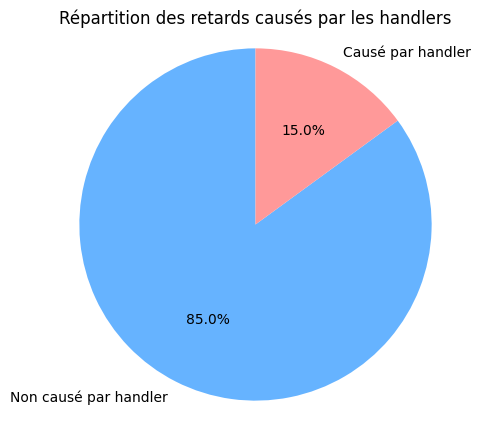

In [13]:
# =========================
# 2️⃣ Pie chart pour Handler (True/False)
# =========================
handler_counts = coderetard['Handler'].value_counts()
labels = ['Non causé par handler', 'Causé par handler'] if True in handler_counts.index else handler_counts.index
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(5, 5))
plt.pie(handler_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Répartition des retards causés par les handlers")
plt.axis('equal')  # Cercle parfait
plt.show()




/Users/zahra/Desktop/DelayPrediction /.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


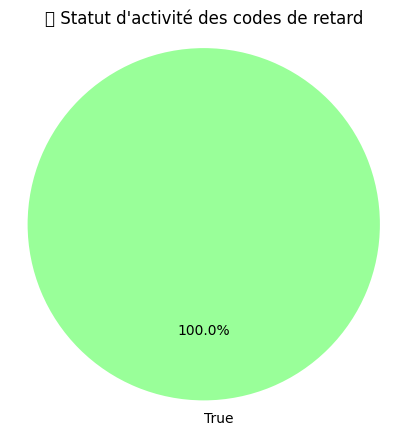

In [14]:
import matplotlib.pyplot as plt

# Comptage des valeurs uniques dans RecordStatut
status_counts = coderetard['RecordStatut'].value_counts()

# Récupère les labels à partir des index du Series
labels = status_counts.index.astype(str)  # Par exemple: ['True', 'False']

# Liste des couleurs (autant que de catégories)
colors = ['#99ff99', '#ffcc99'][:len(status_counts)]  # Ajuste la longueur si besoin

# Tracer le pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("📊 Statut d'activité des codes de retard")
plt.axis('equal')
plt.show()


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2242/3342066407.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=aptterminal, x='Aeroport_id', palette='Reds')


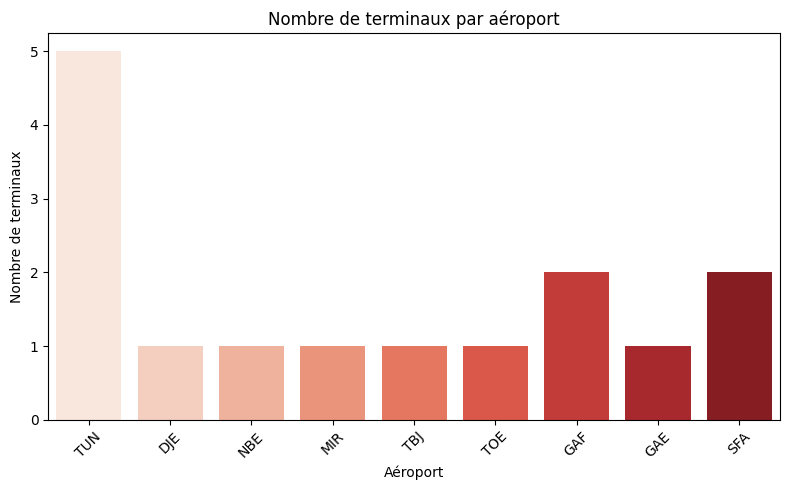

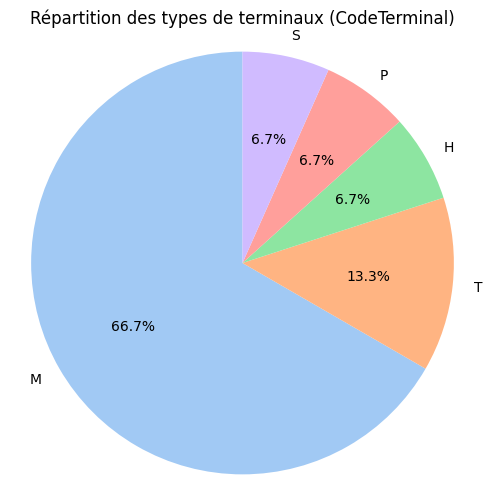

🔁 Doublons détectés (CodeTerminal + Aeroport_id) :


,TerminalId,CodeTerminal,Nom,Notes,RecordStatut,Aeroport_id
10,11,M,Main Terminal,NaN,True,GAF
12,13,M,Main Terminal,NaN,True,GAF


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
aptterminal = pd.read_csv('opscontrol_aptterminal.csv')

# 1. Nombre de terminaux par aéroport
plt.figure(figsize=(8, 5))
sns.countplot(data=aptterminal, x='Aeroport_id', palette='Reds')
plt.title("Nombre de terminaux par aéroport")
plt.xlabel("Aéroport")
plt.ylabel("Nombre de terminaux")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Répartition des types de terminaux (CodeTerminal)
plt.figure(figsize=(6, 6))
terminal_counts = aptterminal['CodeTerminal'].value_counts()
terminal_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Répartition des types de terminaux (CodeTerminal)")
plt.ylabel("")  # Hide y-label
plt.axis('equal')
plt.show()

# 3. Doublons de CodeTerminal pour le même aéroport
duplicate_check = aptterminal.duplicated(subset=['CodeTerminal', 'Aeroport_id'], keep=False)
duplicates = aptterminal[duplicate_check]
if not duplicates.empty:
    print("🔁 Doublons détectés (CodeTerminal + Aeroport_id) :")
    display(duplicates)
else:
    print("✅ Aucun doublon CodeTerminal/Aeroport_id détecté.")


/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2242/1999076579.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=agents, y='Fonction', order=agents['Fonction'].value_counts().index, palette='Oranges')


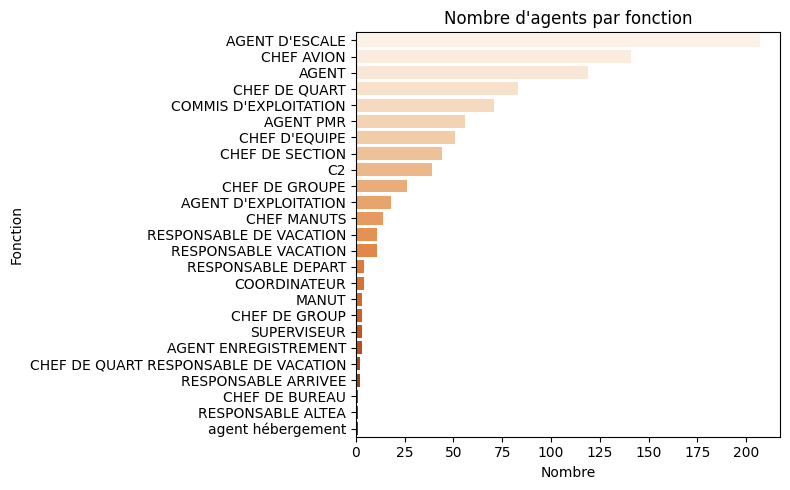

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2242/1999076579.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=agents, y='Departement_Nom', order=agents['Departement_Nom'].value_counts().index, palette='Greens')


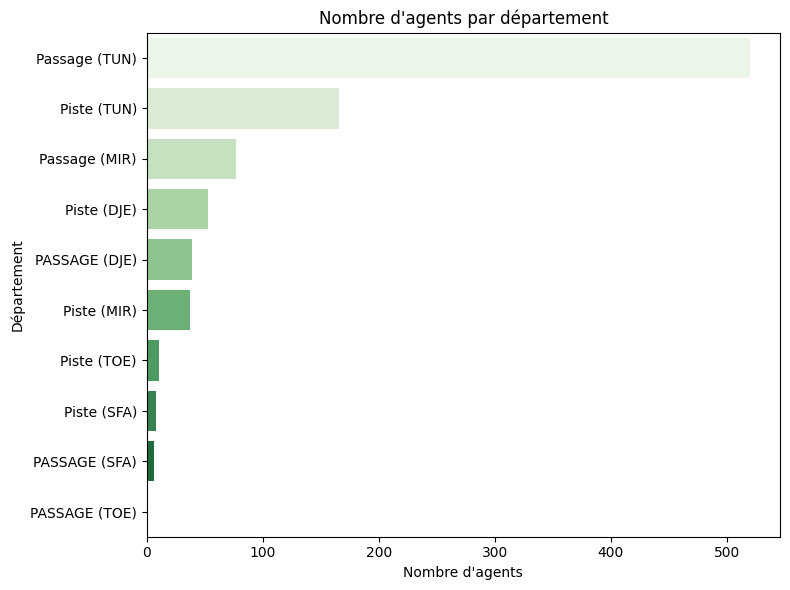

/var/folders/gp/q_rht33j52g96p_m9v3ss8d80000gn/T/ipykernel_2242/1999076579.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=agents, y='Service_Nom', order=agents['Service_Nom'].value_counts().index, palette='Purples')


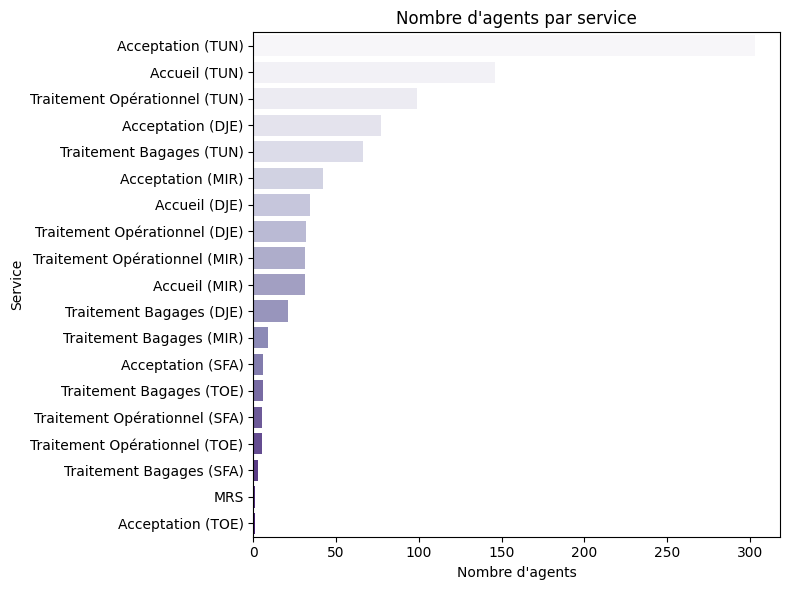


🔁 Doublons basés sur Matricule :
✅ Aucun doublon trouvé.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 📥 Chargement des datasets
agents = pd.read_csv('opscontrol_agent.csv')
departements = pd.read_csv('opscontrol_departement.csv')
services = pd.read_csv('opscontrol_service.csv')
aeroports = pd.read_csv('opscontrol_aeroport.csv')

# 🔗 Fusion des données
agents = pd.merge(agents, departements, left_on='Departement_id', right_on='DepartementId', how='left')
agents = pd.merge(agents, services, left_on='Service_id', right_on='ServiceId', how='left')

# 🏷 Renommage pour plus de clarté
agents.rename(columns={
    'Description_x': 'Departement_Nom',
    'Description_y': 'Service_Nom',
    'Description': 'Entite_Nom',
    'Nom': 'Aeroport_Nom'
}, inplace=True)

# 🎨 Visualisation : Fonction des agents
plt.figure(figsize=(8, 5))
sns.countplot(data=agents, y='Fonction', order=agents['Fonction'].value_counts().index, palette='Oranges')
plt.title("Nombre d'agents par fonction")
plt.xlabel("Nombre")
plt.ylabel("Fonction")
plt.tight_layout()
plt.show()



# 🏢 Par département
plt.figure(figsize=(8, 6))
sns.countplot(data=agents, y='Departement_Nom', order=agents['Departement_Nom'].value_counts().index, palette='Greens')
plt.title("Nombre d'agents par département")
plt.xlabel("Nombre d'agents")
plt.ylabel("Département")
plt.tight_layout()
plt.show()

# 🛠 Par service
plt.figure(figsize=(8, 6))
sns.countplot(data=agents, y='Service_Nom', order=agents['Service_Nom'].value_counts().index, palette='Purples')
plt.title("Nombre d'agents par service")
plt.xlabel("Nombre d'agents")
plt.ylabel("Service")
plt.tight_layout()
plt.show()



# ✅ Doublons
print("\n🔁 Doublons basés sur Matricule :")
duplicates = agents[agents.duplicated(subset='Matricule')]
if not duplicates.empty:
    display(duplicates)
else:
    print("✅ Aucun doublon trouvé.")


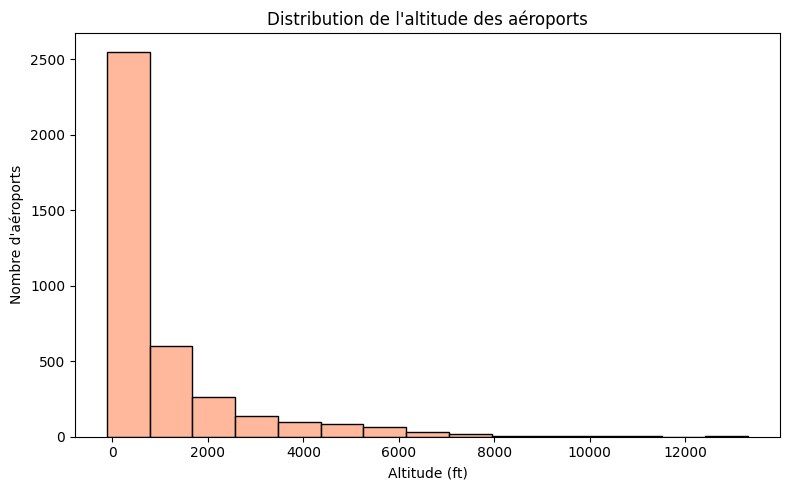

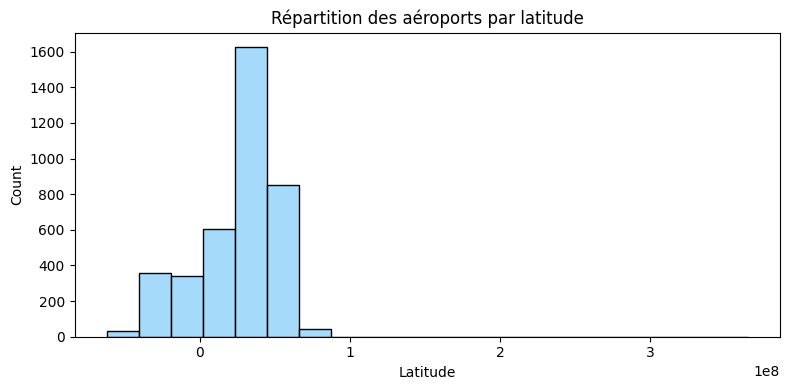

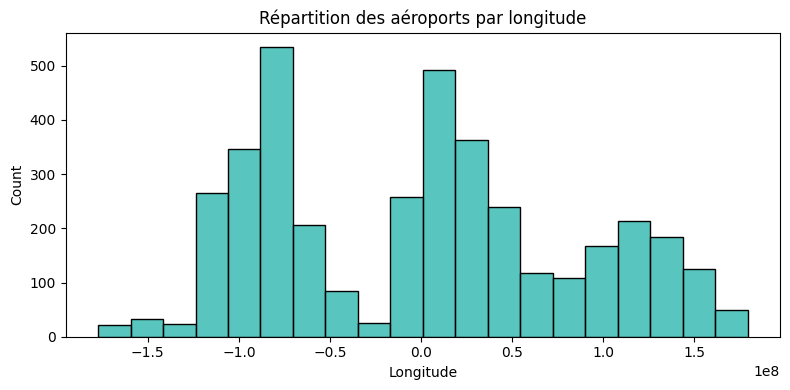

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement de la table des aéroports internationaux
aero = pd.read_csv('opscontrol_aeroport.csv')  # adapte le nom du fichier

# Histogramme : Distribution des élévations
plt.figure(figsize=(8, 5))
sns.histplot(aero['Elevation'], bins=15, color='#ffa07a')
plt.title("Distribution de l'altitude des aéroports")
plt.xlabel("Altitude (ft)")
plt.ylabel("Nombre d'aéroports")
plt.tight_layout()
plt.show()

# Histogramme : Répartition des latitudes (Nord vs Sud)
plt.figure(figsize=(8, 4))
sns.histplot(aero['Latitude'], bins=20, color='#87cefa')
plt.title("Répartition des aéroports par latitude")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()

# Histogramme : Répartition des longitudes (Est vs Ouest)
plt.figure(figsize=(8, 4))
sns.histplot(aero['Longitude'], bins=20, color='#20b2aa')
plt.title("Répartition des aéroports par longitude")
plt.xlabel("Longitude")
plt.tight_layout()
plt.show()
